# Using Xception on Intel Image Classification Challenge
Group 7

# IMPORTING NECESSARY LIBRARIES

In [1]:
import os
import glob
import numpy as np
import tensorflow 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.applications import ResNet50,VGG16 
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from PIL import Image 
%matplotlib inline

E:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (

# I.Introduction and Motivation
## 1.background
As a popular research area in the AI industry, the problem of image recognition has been encountered in many practical applications.
 
For an automatic driving system, whatever automobile or aerial vehicle, when it is placed in a capricious external environment, responses based on what type of objects it has seen by its camera to avoid conflicts and accidents. Meanwhile, when the mentioned vehicles, are sent to explore somewhere unknown and not suited for humans to go, like a mysterious cave or even other planets, they record a huge number of images. More satellites are able to even take a high-resolution picture of nearly anywhere on the earth which are exposed to the air. It is such an onerous task to analyze these images manually that we need an efficient method to extract quantitative information from them and transform the visual images to statistic report, like what proportion of land is covered by vegetation in a certain area, or what is the density of architectures in big cities.

Our goal is to develop a system that can accurately identify different scenarios, hoping to enhance a robot's ability as an explorer. To this end, we chose to use the intel classification dataset. We believe this is a reasonable starting point to tackle the challenge, as it contains multiple distinct scenarios relating to nature.

So, in our project, we use the Intel Image Classification Dataset, which consists of natural scenes, like buildings, forest, glacier, around the world. We apply the simple convolution neural network, inception and Xception model to the dataset and get a comprehensive result. 
## 2.Roadmap
In this project, we first discuss our data, as well as where they come from, how they are loaded and what they look alike. We then build 3 models, simple convolutional neural network, Inception and Xception respectively, and evaluate their peformence by the metric of accuracy. 
#### **// TODO**

# ll.Data Preprocessing

## Data

Our dataset is provided by Intel and it consists of image data of natural scenes around the world. This Data contains around 25k images of size 150x150 distributed under 6 categories, which are showed in the following chart.

|  Label   | Type  |
|----|----|
| 0|buildings|
| 1|forest|
| 2|glacier|
| 3|mountain|
| 4|sea|
| 5|street|

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge. Thanks to https://datahack.analyticsvidhya.com for the challenge, Intel for the Data, and Jan Böttinger on Unsplash for the photos.

## Data exploring

Firstly, we take a look at the directory containing the the images. In the `./Intel_Image_classification` path, there are 3 folders in it, `seg_train`, `seg_test`, `seg_pred` respectively. Except the `seg_pred` directory which contains no label, others contain 6 sub folders corresponding to the mentioned 6 categories. Here is an exploration of the training set directory.

In [2]:
glob.glob('Intel_Image_classification/seg_train/seg_train/*')

['Intel_Image_classification/seg_train/seg_train\\buildings',
 'Intel_Image_classification/seg_train/seg_train\\forest',
 'Intel_Image_classification/seg_train/seg_train\\glacier',
 'Intel_Image_classification/seg_train/seg_train\\mountain',
 'Intel_Image_classification/seg_train/seg_train\\sea',
 'Intel_Image_classification/seg_train/seg_train\\street']

Then, we make a function to convert images to a form suitable for our convolutional neural networks to work on arrays. In this function, each of image in the specified `path` paramater is scanned and transformed to an array form. we use the `load_img` function provided by keras to load an image into PIL format and the `img_to_array` function to convert a PIL Image instance to a Numpy array. After loading them, we apply normalization on them that the RGB numbers of the images which scale from 0 to 255 are divided by 255 that they scale from 0 to 1. Finally, all of the images and their corresponding labels are returned in a tuple form.

# Vectorization

In [3]:
def prepare_dataset(path,label):
    x_train=[]
    y_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
            y_train.append(label)
    return np.array(x_train),np.array(y_train)

# Read The Labels Into a List

In [4]:
paths=glob.glob('Intel_Image_classification/seg_train/seg_train/*')
l=len('Intel_Image_classification/seg_train/seg_train/')
labels=[]
for path in paths:
    labels.append(path[l:])
    print(labels)

['buildings']
['buildings', 'forest']
['buildings', 'forest', 'glacier']
['buildings', 'forest', 'glacier', 'mountain']
['buildings', 'forest', 'glacier', 'mountain', 'sea']
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


## Now let's take a look at the images

Text(0.5, 0, 'Street')

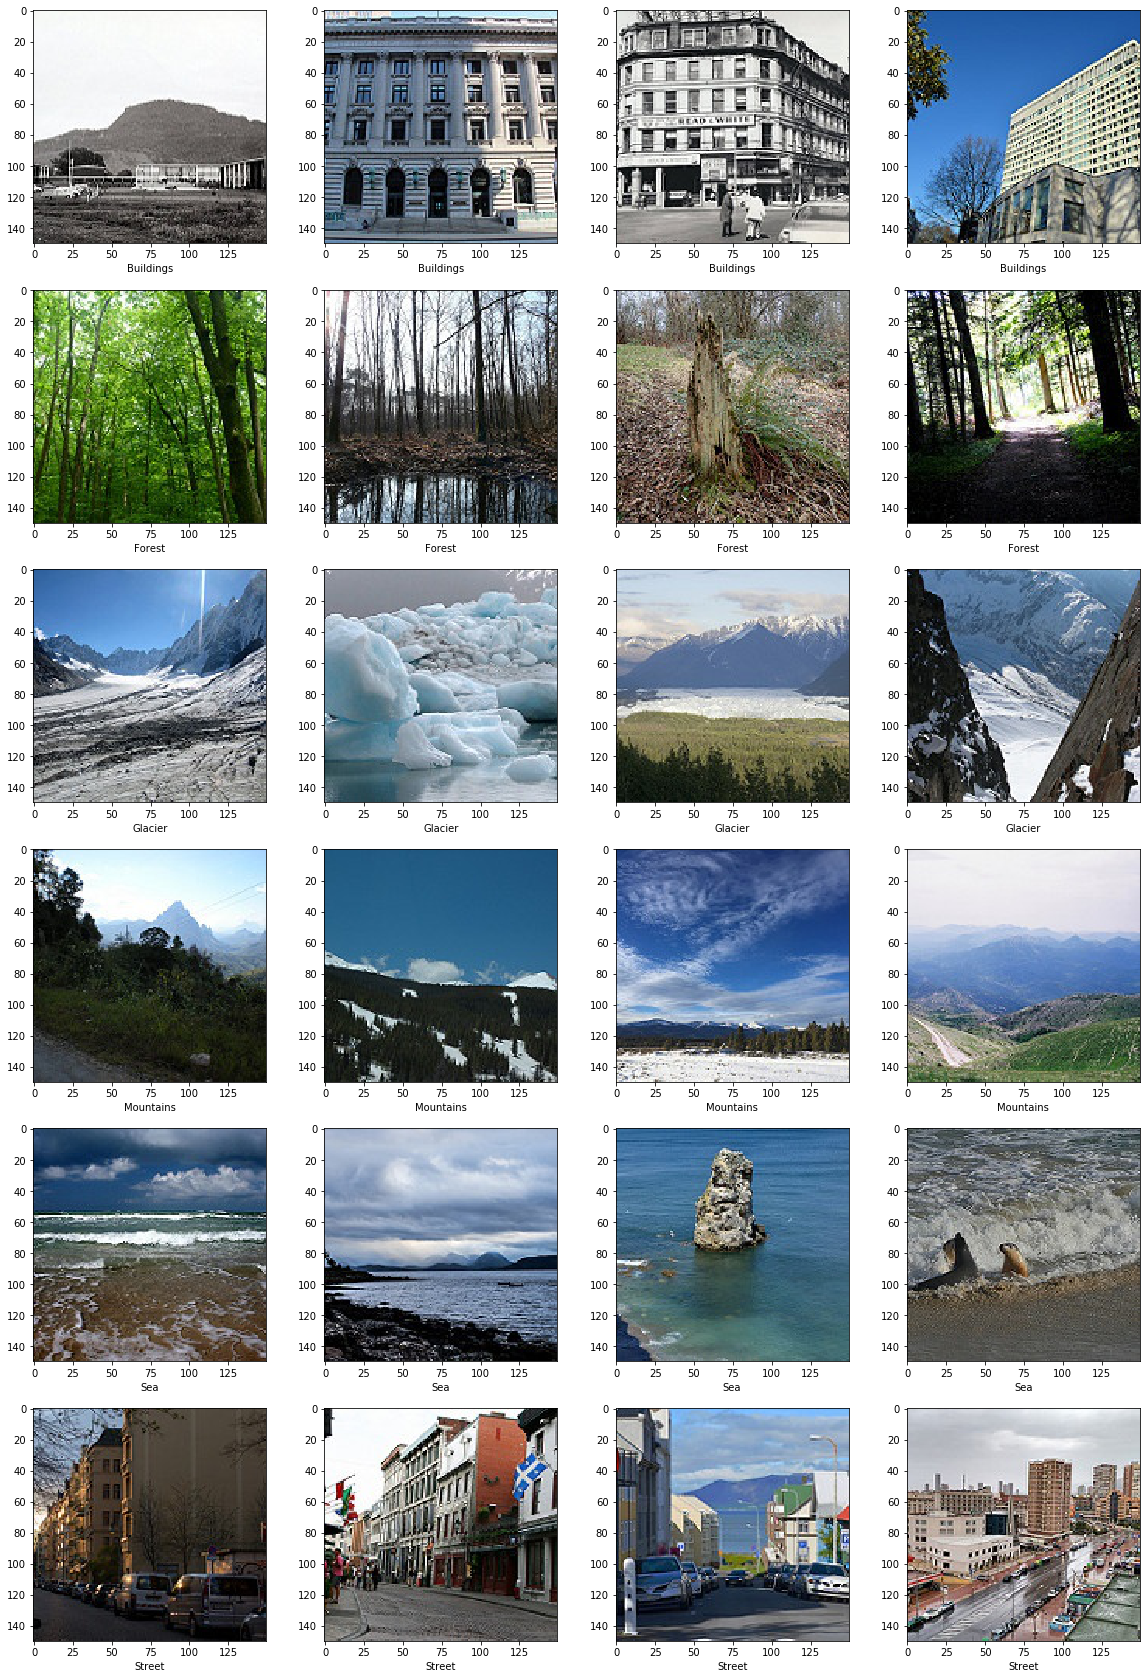

In [5]:
fig=plt.figure(figsize=(20,30))
ax = fig.add_subplot(6, 4, 1)
image1 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/0.jpg")
imgplot=plt.imshow(image1)
plt.xlabel('Buildings')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/53.jpg")
ax = fig.add_subplot(6, 4, 2)
imgplot=plt.imshow(image2)
plt.xlabel('Buildings')
image3 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/66.jpg")
ax = fig.add_subplot(6, 4, 3)
imgplot=plt.imshow(image3)
plt.xlabel('Buildings')
image4 = load_img("Intel_Image_classification/seg_train/seg_train/buildings/112.jpg")
ax = fig.add_subplot(6, 4, 4)
imgplot=plt.imshow(image4)
plt.xlabel('Buildings')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/8.jpg")
ax = fig.add_subplot(6, 4, 5)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/23.jpg")
ax = fig.add_subplot(6, 4, 6)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/41.jpg")
ax = fig.add_subplot(6, 4, 7)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/forest/46.jpg")
ax = fig.add_subplot(6, 4, 8)
imgplot=plt.imshow(image2)
plt.xlabel('Forest')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/10.jpg")
ax = fig.add_subplot(6, 4, 9)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/13.jpg")
ax = fig.add_subplot(6, 4, 10)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/15.jpg")
ax = fig.add_subplot(6, 4, 11)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/glacier/18.jpg")
ax = fig.add_subplot(6, 4, 12)
imgplot=plt.imshow(image2)
plt.xlabel('Glacier')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/16.jpg")
ax = fig.add_subplot(6, 4, 13)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/17.jpg")
ax = fig.add_subplot(6, 4, 14)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/32.jpg")
ax = fig.add_subplot(6, 4, 15)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/mountain/34.jpg")
ax = fig.add_subplot(6, 4, 16)
imgplot=plt.imshow(image2)
plt.xlabel('Mountains')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/136.jpg")
ax = fig.add_subplot(6, 4, 17)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/90.jpg")
ax = fig.add_subplot(6, 4, 18)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/20.jpg")
ax = fig.add_subplot(6, 4, 19)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/sea/21.jpg")
ax = fig.add_subplot(6, 4, 20)
imgplot=plt.imshow(image2)
plt.xlabel('Sea')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/2.jpg")
ax = fig.add_subplot(6, 4, 21)
imgplot=plt.imshow(image2)
plt.xlabel('Street')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/9.jpg")
ax = fig.add_subplot(6, 4, 22)
imgplot=plt.imshow(image2)
plt.xlabel('Street')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/12.jpg")
ax = fig.add_subplot(6, 4, 23)
imgplot=plt.imshow(image2)
plt.xlabel('Street')
image2 = load_img("Intel_Image_classification/seg_train/seg_train/street/19.jpg")
ax = fig.add_subplot(6, 4, 24)
imgplot=plt.imshow(image2)
plt.xlabel('Street')

# Vectorize All the Training Set

In [6]:
trainX_building, trainY_building  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/buildings/",0)
trainX_forest,trainY_forest  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/forest/",1)
trainX_glacier,trainY_glacier  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/glacier/",2)
trainX_mount,trainY_mount  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/mountain/",3)
trainX_sea,trainY_sea  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/sea/",4)
trainX_street,trainY_street  = prepare_dataset("Intel_Image_classification/seg_train/seg_train/street/",5)

print('train building shape ', trainX_building.shape, trainY_building.shape) 
print('train forest', trainX_forest.shape ,trainY_forest.shape)
print('train glacier', trainX_glacier.shape,trainY_glacier.shape)
print('train mountain', trainX_mount.shape, trainY_mount.shape)
print('train sea',     trainX_sea.shape, trainY_sea.shape)
print('train street', trainX_street.shape ,trainY_street.shape)

train building shape  (2191, 150, 150, 3) (2191,)
train forest (2271, 150, 150, 3) (2271,)
train glacier (2404, 150, 150, 3) (2404,)
train mountain (2512, 150, 150, 3) (2512,)
train sea (2274, 150, 150, 3) (2274,)
train street (2382, 150, 150, 3) (2382,)


# Concatenating All the Training Data with Different Label and Assemble Them Into a Single Train Data Set

In [7]:
x_train=np.concatenate((trainX_building,trainX_forest,trainX_glacier,trainX_mount,trainX_sea,trainX_street),axis=0)
y_train=np.concatenate((trainY_building,trainY_forest,trainY_glacier,trainY_mount,trainY_sea,trainY_street),axis=0)

In [8]:
print(x_train.shape)
print(y_train.shape)

(14034, 150, 150, 3)
(14034,)


# Same for the Testing Set

In [9]:
testX_building, testY_building  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/buildings/",0)
testX_forest,testY_forest  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/forest/",1)
testX_glacier,testY_glacier  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/glacier/",2)
testX_mount,testY_mount  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/mountain/",3)
testX_sea,testY_sea  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/sea/",4)
testX_street,testY_street  = prepare_dataset("Intel_Image_classification/seg_test/seg_test/street/",5)

x_test=np.concatenate((testX_building,testX_forest,testX_glacier,testX_mount,testX_sea,testX_street),axis=0)
y_test=np.concatenate((testY_building,testY_forest,testY_glacier,testY_mount,testY_sea,testY_street),axis=0)

# Generate Batches of Tensor Image Data with Real-Time Data Augmentation. 

In [10]:
img_aug_tr = ImageDataGenerator(rescale=1./255)
train_gen = img_aug_tr.flow_from_directory('Intel_Image_classification/seg_train/seg_train/',
                                       target_size=(150,150),
                                       class_mode='categorical',
                                       batch_size = 16)

Found 14034 images belonging to 6 classes.


In [11]:
img_aug_tr = ImageDataGenerator(rescale=1./255)
test_gen = img_aug_tr.flow_from_directory('Intel_Image_classification/seg_test/seg_test/',
                                       target_size=(150,150),
                                       class_mode='categorical',
                                       batch_size = 16)

Found 3000 images belonging to 6 classes.


### If it's tensorflow-gpu=2.2.0 or higher, use fit() instead of fit_generator

In [12]:
from tensorflow.python import keras
print(keras.__version__)

2.1.6-tf


# lll.Models
**Our Baseline Convolutional Model**

This is our baseline model. A regular convolution model with 7 convolution layers and several dropoout layers and BatchNormalization layers to reduce overfitting and covariate shift. With all the kernel sizes being 3x3 and pool size 2x2, it gives us a 82.20% accuracy. And to be fair it's not bad for a regular model.

In [13]:

#model = Sequential()
#
#model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', input_shape = (150, 150, 3)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))
#model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))
#model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Conv2D(512, kernel_size = (3,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Flatten())
#model.add(Dense(64, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.33))
#model.add(Dense(32, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Dense(6, activation = 'softmax')) 
#
#model.summary()

In [14]:
#from tensorflow.keras.utils import plot_model
#plot_model(model,to_file="hand_made_model.png",show_shapes=True,show_layer_names=False,rankdir='TB')
#plt.figure(figsize=(30,65))
#img1=plt.imread("hand_made_model.png")
#plt.imshow(img1)
#plt.axis('off')
#plt.show

# Compile The Model

In [15]:
#model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

# TRAINING THE MODEL FOR 10 EPOCHS

In [16]:
#history = model.fit_generator(
#       train_gen,
#       epochs=10,
#       validation_data=test_gen)

In [17]:
#def plot_hist(history):
#    # your code here
#    fig, axs = plt.subplots(1,2, figsize=(15,5))
#
#    for i, to_plot in enumerate(['loss', 'acc']):
#        axs[i].plot(history.history[f'{to_plot}'], label='train')
#        axs[i].plot(history.history[f'val_{to_plot}'], label='test')
#        axs[i].set_ylabel(to_plot)
#        axs[i].set_xlabel('epoch')
#        axs[i].legend()
#    #end your code here
#        
#plot_hist(history)

#  It's a Fairly Good Performance On our Image Data, It's Validation Accuracy is 82.20 %

![title](img/Go_Deeper.jpeg)

# INCEPTION-V3

![title](img/Glacier.png)

   Salient parts in the image can have extremely large variation in size. For instance, in the first one the part contain glacier are only on the top of the image, in the second one glacier ocuppy half of the image and in the last image it occupy the whole image.
   "Because of this huge variation in the location of the information, choosing the right kernel size for the convolution operation becomes tough. A larger kernel is preferred for information that is distributed more globally, and a smaller kernel is preferred for information that is distributed more locally."--<<A Simple Guide to the Versions of the Inception Network>>
    So we know that a certain filter size may not be suitable for all scenario and what Inception did was having multiple filters with different size oprating on the same layer. And then the outputs are concatenated and sent to next module. 

## The reason for having 1,3,5 kernel size is to better concat them later, just set the pad=0,1,2 , it will have the same dimension feature after conv. 

![title](img/a.png)

## After getting the network wider, it will be more computational expensive.And that's when 1x1 conv comes to stage

![title](img/b.png)

## How did 1x1 conv increase or decrease dimension

## It all depends on the number of 1x1 filter

![1x1 conv increase and decrease dimension](img/aa.jpg)

# Using the dimension reduction model, a Inception model was built!

![title](img/Inception_V3_image.png)

## The deeper the network, the more abstract the features are，and feature's respective field become larger. So as the layers increase,3x3 conv and 5x5 conv also increase in number

## A bigger kernel means bigger respective fields,but it also brings more parameter.A 5x5 convolution is 25/9=2.78 times more expensive than a 3x3, so with 2 3x3 conv replacing one 5x5 can keep the respective field the same while using less parameter.

![title](img/adff.jpg)

## Building a Inception-V3 model, with pretrained weights from imageNet

In [18]:
def clear_folder(folder):
    if os.path.exists(folder):
        for the_file in os.listdir(folder):
            file_path = os.path.join(folder, the_file)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
            except Exception as e:
                print(e)

In [19]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
#from keras import backend as K
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sn
from tensorflow.keras import backend as K

## Set the layers.trainable to false so that it will not forget the weights gained from pretraining. Then we pass the feature to 2 fully connected layers, (with Dropout) and apply softmax for the prediction. Train for 8 epochs

In [20]:
#def_plot_hist
def plot_hist(history):
    # your code here
    fig, axs = plt.subplots(1,2, figsize=(15,5))

    for i, to_plot in enumerate(['loss', 'acc']):
        axs[i].plot(history.history[f'{to_plot}'], label='train')
        axs[i].plot(history.history[f'val_{to_plot}'], label='test')
        axs[i].set_ylabel(to_plot)
        axs[i].set_xlabel('epoch')
        axs[i].legend()


# Release memory after each run

# Inception Random False

In [37]:
def build_model_incep_random_F():
    pre_trained_model_incep_random = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights=None)
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_incep_random.layers:
        layer.trainable = False
        
    last_layer = pre_trained_model_incep_random.get_layer('mixed7')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_incep_randomF = Model(pre_trained_model_incep_random.input, x)
    model_incep_randomF.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_incep_randomF

last layer output shape:  (None, 7, 7, 768)
Run  0
Epoch 1/3
878/878 [==============================] - 74s 84ms/step - loss: 1.4364 - acc: 0.4277 - val_loss: 1.7918 - val_acc: 0.1437
Epoch 2/3
878/878 [==============================] - 63s 71ms/step - loss: 1.2135 - acc: 0.5261 - val_loss: 1.7918 - val_acc: 0.1497
Epoch 3/3
878/878 [==============================] - 64s 73ms/step - loss: 1.1458 - acc: 0.5542 - val_loss: 1.7918 - val_acc: 0.1457
Test accuracy:  14.6
last layer output shape:  (None, 7, 7, 768)
Run  1
Epoch 1/3
878/878 [==============================] - 71s 81ms/step - loss: 1.4455 - acc: 0.4171 - val_loss: 1.7919 - val_acc: 0.1577
Epoch 2/3
878/878 [==============================] - 64s 73ms/step - loss: 1.2367 - acc: 0.5164 - val_loss: 1.7919 - val_acc: 0.1573
Epoch 3/3
878/878 [==============================] - 63s 72ms/step - loss: 1.1508 - acc: 0.5555 - val_loss: 1.7919 - val_acc: 0.1550
Test accuracy:  15.5
last layer output shape:  (None, 7, 7, 768)
Run  2
Epoch 1

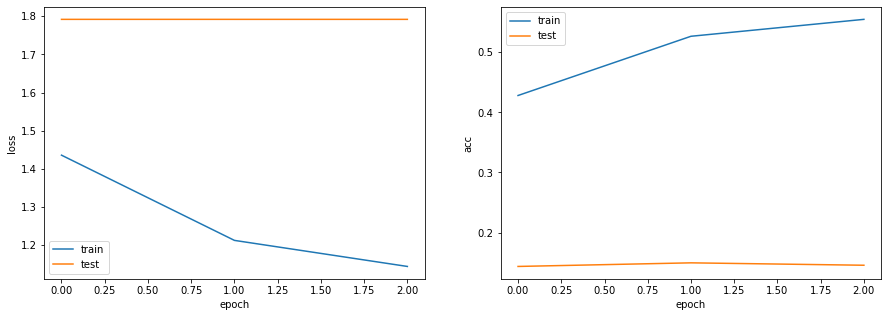

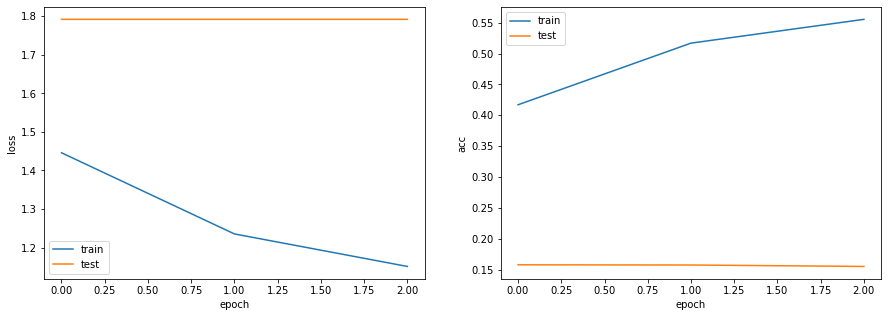

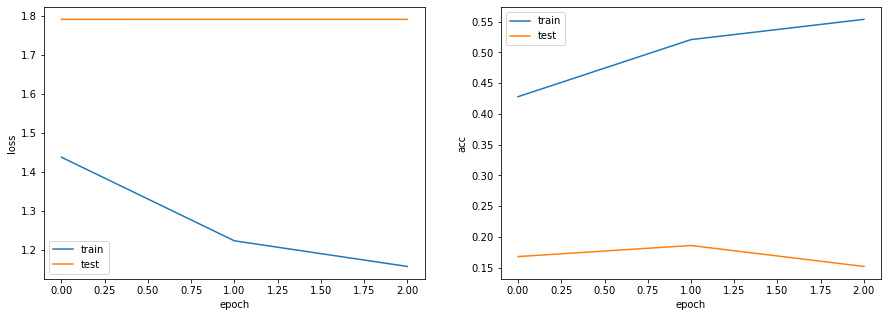

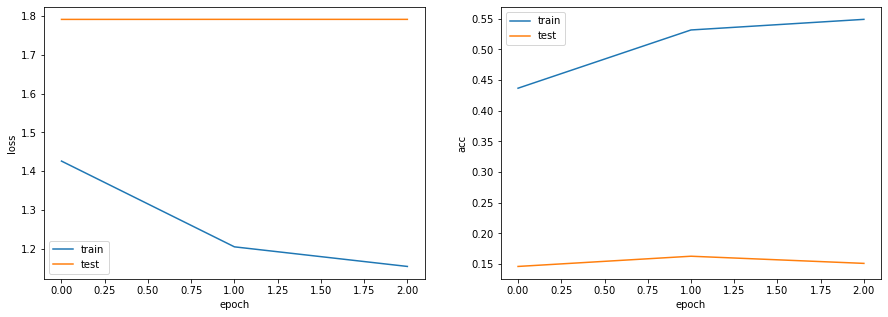

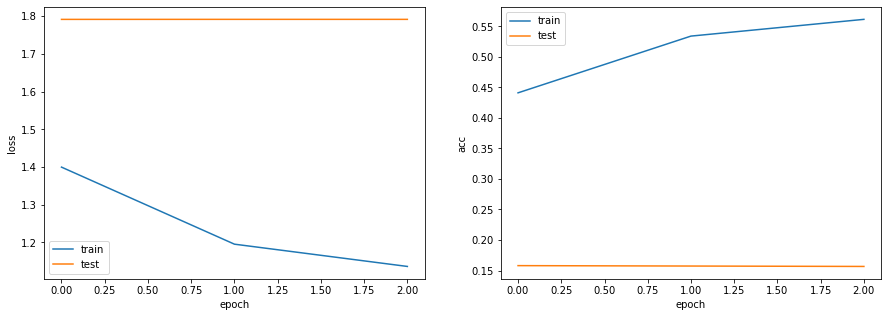

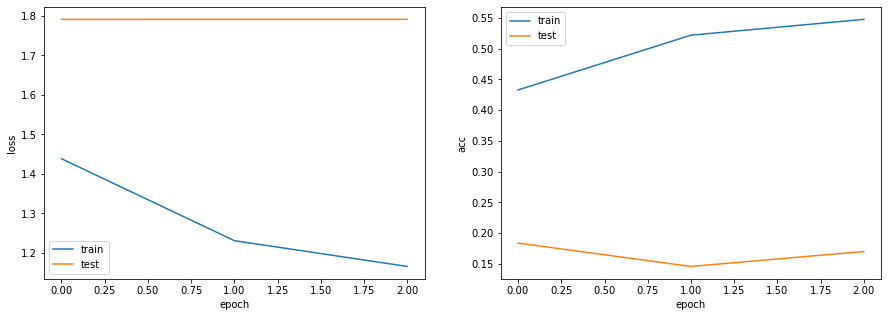

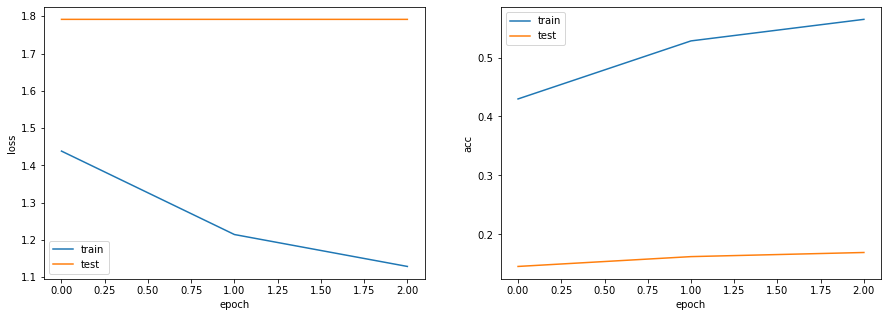

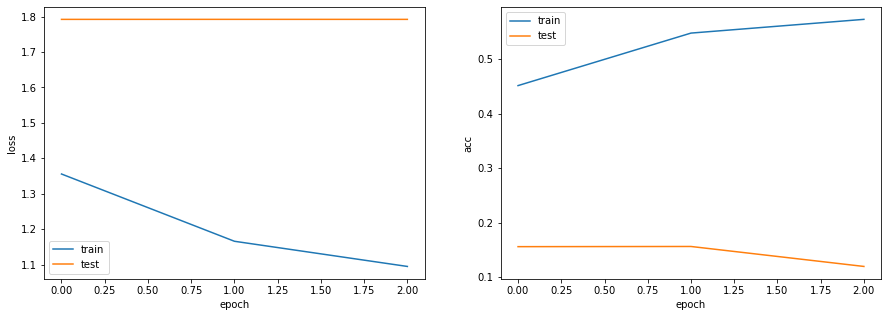

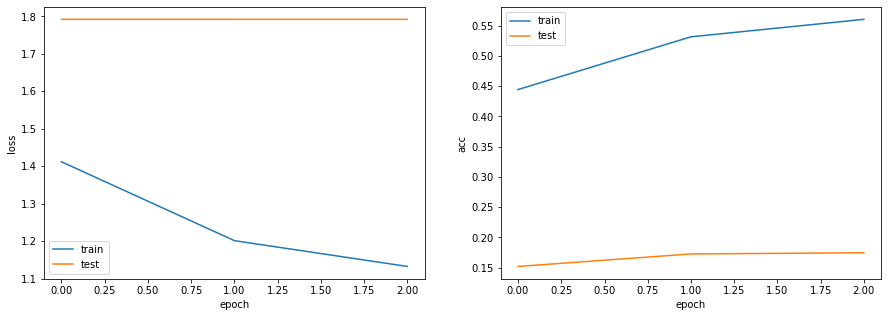

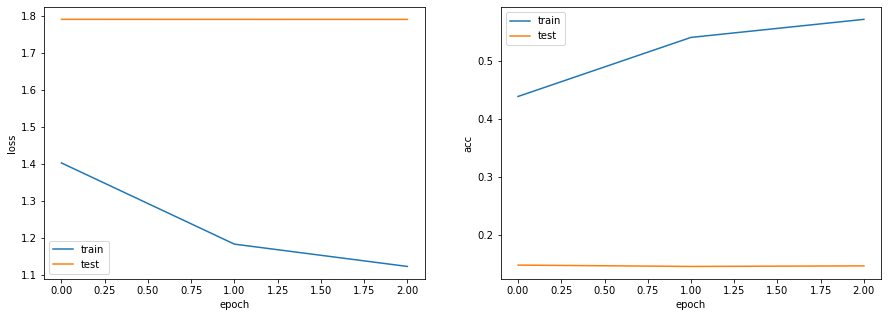

In [38]:
num_runs = 10
train_accuracy_incep_random_F = []
test_accuracy_incep_random_F = []
val_accuracy_incep_random_F = []
predictions_incep_random_F = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_incep_random_F=build_model_incep_random_F()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_incep_random_F = model_incep_random_F.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_incep_random_F.append(history_incep_random_F.history['acc'][-1])
    val_accuracy_incep_random_F.append(history_incep_random_F.history['val_acc'][-1])
    # Prediction
    prediction_incep_random_F = model_incep_random_F.predict(x_test)
    acc_incep_random_F = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_incep_random_F, axis = -1),normalize = True)
    test_accuracy_incep_random_F.append(acc_incep_random_F)
    predictions_incep_random_F.append(prediction_incep_random_F)
    print('Test accuracy: ' , round(acc_incep_random_F * 100,1))
    plot_hist(history_incep_random_F)
    K.clear_session()


[array([[0.1670389 , 0.16657527, 0.16653673, 0.16652557, 0.16647339,
        0.1668502 ],
       [0.16703586, 0.16654848, 0.16654663, 0.16652076, 0.16649394,
        0.16685423],
       [0.16700292, 0.16654913, 0.16655937, 0.16650298, 0.16650109,
        0.16688451],
       ...,
       [0.16695891, 0.16639325, 0.16663486, 0.16664788, 0.16656958,
        0.16679563],
       [0.16704881, 0.16652696, 0.16655414, 0.16655771, 0.16650292,
        0.16680944],
       [0.16700646, 0.16649936, 0.16657695, 0.16660288, 0.16653518,
        0.16677928]], dtype=float32), array([[0.16677383, 0.16732632, 0.16633444, 0.1664259 , 0.16683649,
        0.16630301],
       [0.16671948, 0.16723654, 0.16643366, 0.16641936, 0.1669087 ,
        0.1662823 ],
       [0.16675512, 0.16725618, 0.16638775, 0.16640683, 0.16685188,
        0.1663422 ],
       ...,
       [0.16669005, 0.16718562, 0.16646218, 0.16648635, 0.16683078,
        0.16634509],
       [0.1667295 , 0.16723572, 0.16645189, 0.16637176, 0.16696101,


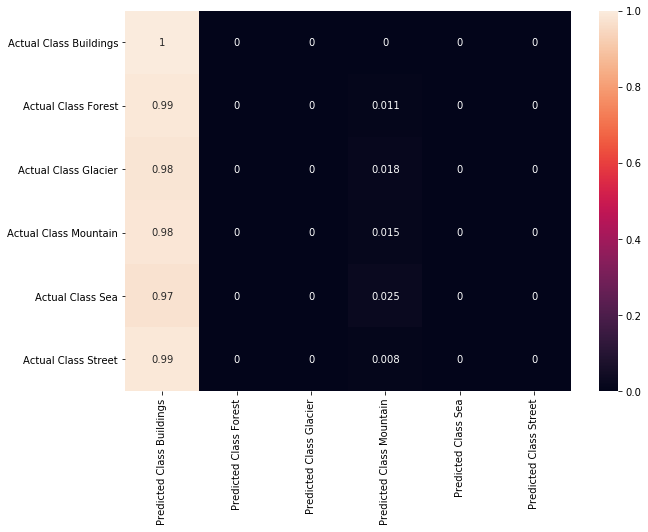

In [39]:
print(predictions_incep_random_F)
# Confusion matrix, averaged over num_runs
classes = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
reverse_classes = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
class_labels = list(reverse_classes.keys())
y_pred_incep_random_F = np.argmax(np.mean(predictions_incep_random_F, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_incep_random_F, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier',
                             'Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier',
                             'Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_incep_random_F)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_incep_random_F)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_incep_random_F)*100, decimals =2))

# Inception Random True

In [40]:
def build_model_incep_random_T():
    pre_trained_model_incep_random = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights=None)
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_incep_random.layers:
        layer.trainable = True
        
    last_layer = pre_trained_model_incep_random.get_layer('mixed7')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_incep_randomT = Model(pre_trained_model_incep_random.input, x)
    model_incep_randomT.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_incep_randomT

last layer output shape:  (None, 7, 7, 768)
Run  0
Epoch 1/3
878/878 [==============================] - 182s 207ms/step - loss: 1.3546 - acc: 0.4614 - val_loss: 1.0194 - val_acc: 0.6060
Epoch 2/3
878/878 [==============================] - 154s 176ms/step - loss: 1.0698 - acc: 0.5824 - val_loss: 0.9304 - val_acc: 0.6440
Epoch 3/3
878/878 [==============================] - 150s 171ms/step - loss: 0.9575 - acc: 0.6327 - val_loss: 0.8724 - val_acc: 0.6670
Test accuracy:  66.7
last layer output shape:  (None, 7, 7, 768)
Run  1
Epoch 1/3
878/878 [==============================] - 187s 213ms/step - loss: 1.3257 - acc: 0.4732 - val_loss: 1.0589 - val_acc: 0.5837
Epoch 2/3
878/878 [==============================] - 154s 175ms/step - loss: 1.0793 - acc: 0.5856 - val_loss: 0.9252 - val_acc: 0.6550
Epoch 3/3
878/878 [==============================] - 155s 176ms/step - loss: 0.9678 - acc: 0.6304 - val_loss: 0.8800 - val_acc: 0.6633
Test accuracy:  66.3
last layer output shape:  (None, 7, 7, 768)
Ru

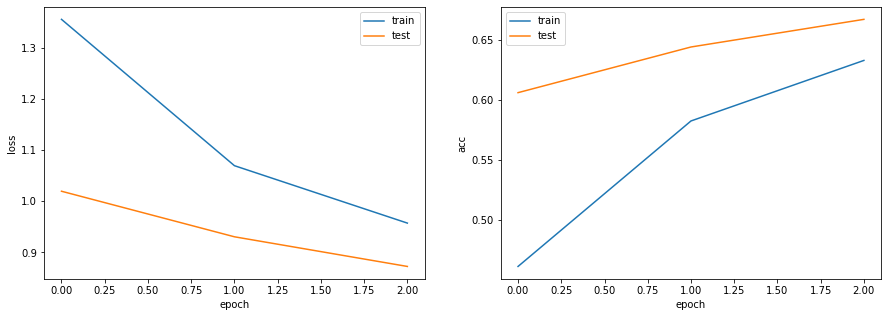

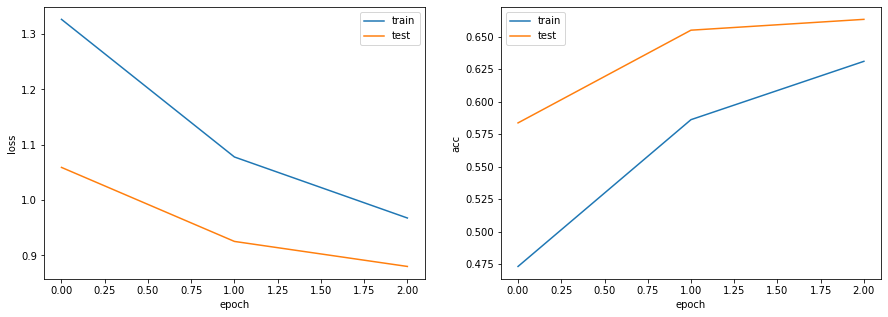

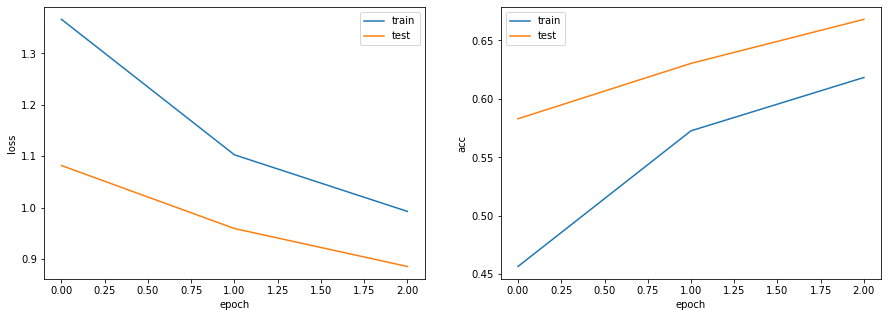

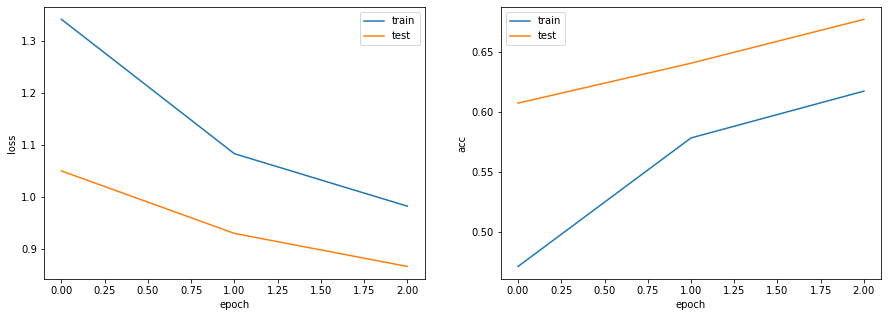

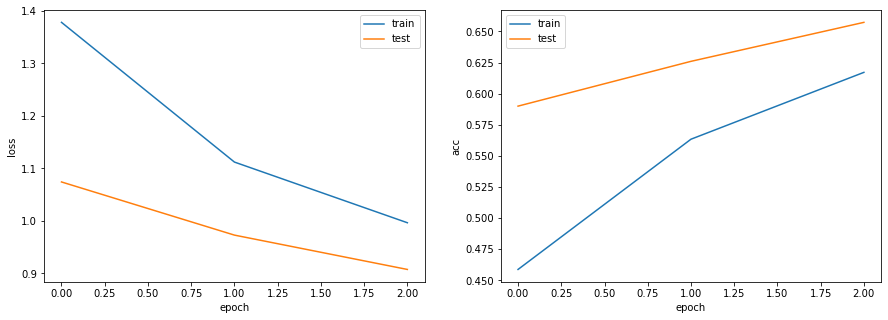

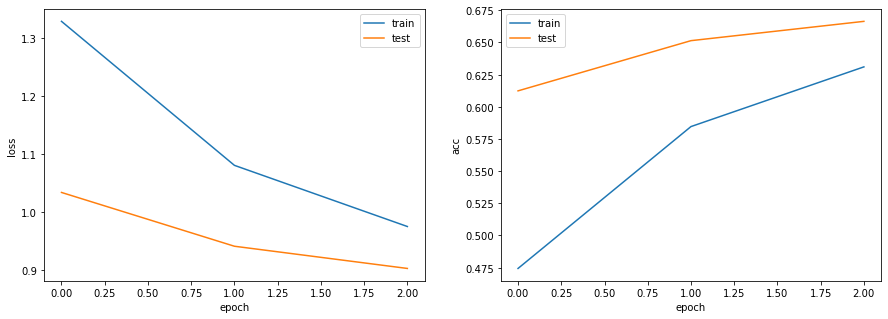

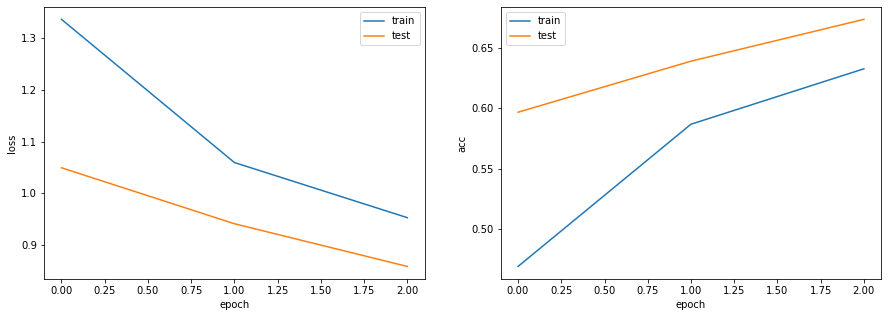

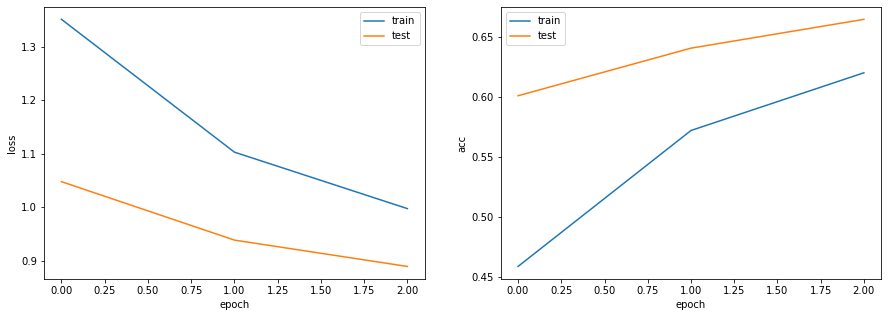

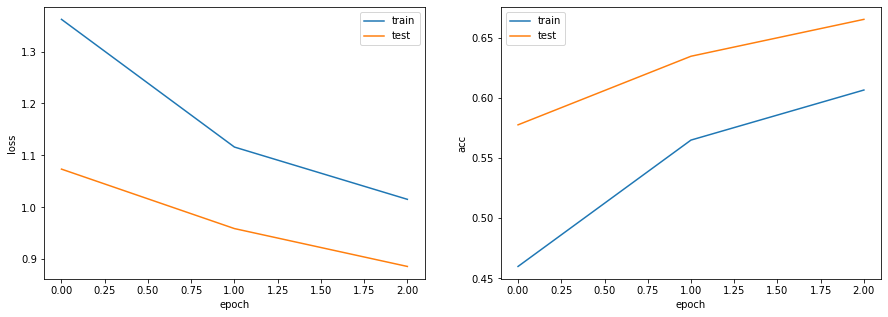

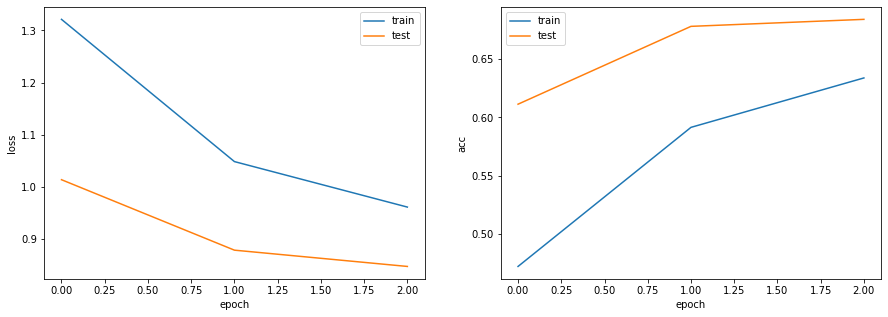

In [41]:
num_runs = 10
train_accuracy_incep_random_T = []
test_accuracy_incep_random_T = []
val_accuracy_incep_random_T = []
predictions_incep_random_T = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_incep_random_T=build_model_incep_random_T()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_incep_random_T = model_incep_random_T.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_incep_random_T.append(history_incep_random_T.history['acc'][-1])
    val_accuracy_incep_random_T.append(history_incep_random_T.history['val_acc'][-1])
    # Prediction
    prediction_incep_random_T = model_incep_random_T.predict(x_test)
    acc_incep_random_T = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_incep_random_T, axis = -1),normalize = True)
    test_accuracy_incep_random_T.append(acc_incep_random_T)
    predictions_incep_random_T.append(prediction_incep_random_T)
    print('Test accuracy: ' , round(acc_incep_random_T * 100,1))
    plot_hist(history_incep_random_T)
    K.clear_session()


[array([[7.3291588e-01, 5.4920637e-03, 6.5524921e-02, 1.0055942e-01,
        6.8642683e-02, 2.6864959e-02],
       [1.8820697e-01, 1.4689496e-01, 3.9348909e-01, 1.5924974e-01,
        7.2098024e-02, 4.0061258e-02],
       [7.5555098e-01, 2.8886057e-02, 1.2118232e-02, 5.4714851e-02,
        3.7654676e-02, 1.1107535e-01],
       ...,
       [6.4927959e-03, 3.0100076e-03, 9.9226251e-02, 5.7188177e-01,
        3.1867579e-01, 7.1343180e-04],
       [5.2837056e-01, 7.9879239e-03, 5.0578389e-02, 9.0391494e-02,
        9.7259842e-02, 2.2541186e-01],
       [2.7049360e-01, 2.2198166e-01, 4.0221754e-03, 2.6397775e-03,
        2.5445865e-03, 4.9831825e-01]], dtype=float32), array([[7.59988427e-01, 3.42024304e-02, 3.81386057e-02, 8.85598734e-02,
        4.13295068e-02, 3.77811193e-02],
       [1.41101241e-01, 4.83864337e-01, 2.18977943e-01, 4.12420928e-02,
        6.04900792e-02, 5.43243140e-02],
       [4.27344829e-01, 7.70623311e-02, 4.79152203e-02, 2.97357500e-01,
        3.82245518e-02, 1.1209

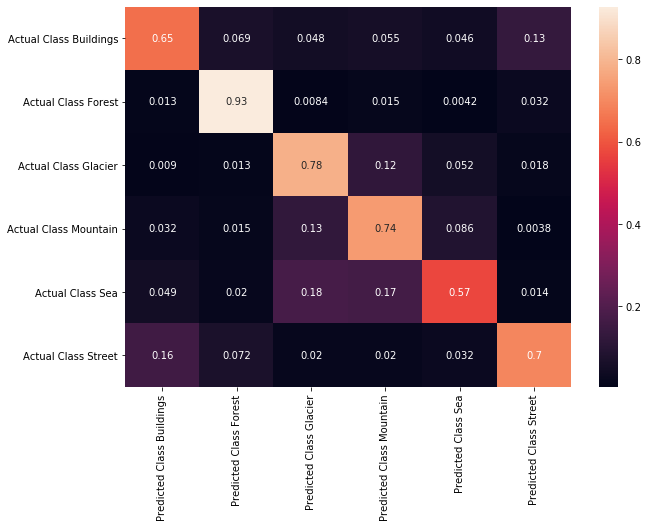

In [42]:
print(predictions_incep_random_T)
# Confusion matrix, averaged over num_runs
y_pred_incep_random_T = np.argmax(np.mean(predictions_incep_random_T, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_incep_random_T, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier','Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier','Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_incep_random_T)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_incep_random_T)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_incep_random_T)*100, decimals =2))

# Inception ImageNet False

In [44]:
def build_model_incep_imageNet_F():
    pre_trained_model_incep_imageNet = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights='imagenet')
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_incep_imageNet.layers:
        layer.trainable = False
        
    last_layer = pre_trained_model_incep_imageNet.get_layer('mixed7')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_incep_imageNetF = Model(pre_trained_model_incep_imageNet.input, x)
    model_incep_imageNetF.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_incep_imageNetF

last layer output shape:  (None, 7, 7, 768)
Run  0
Epoch 1/3
878/878 [==============================] - 89s 101ms/step - loss: 0.6974 - acc: 0.7692 - val_loss: 0.3845 - val_acc: 0.8680
Epoch 2/3
878/878 [==============================] - 64s 73ms/step - loss: 0.3600 - acc: 0.8760 - val_loss: 0.3691 - val_acc: 0.8807
Epoch 3/3
878/878 [==============================] - 64s 72ms/step - loss: 0.2857 - acc: 0.9016 - val_loss: 0.4554 - val_acc: 0.8693
Test accuracy:  86.9
last layer output shape:  (None, 7, 7, 768)
Run  1
Epoch 1/3
878/878 [==============================] - 107s 122ms/step - loss: 0.6902 - acc: 0.7711 - val_loss: 0.4047 - val_acc: 0.8607
Epoch 2/3
878/878 [==============================] - 67s 76ms/step - loss: 0.3530 - acc: 0.8793 - val_loss: 0.4518 - val_acc: 0.8547
Epoch 3/3
878/878 [==============================] - 65s 74ms/step - loss: 0.2800 - acc: 0.9018 - val_loss: 0.4177 - val_acc: 0.8743
Test accuracy:  87.4
last layer output shape:  (None, 7, 7, 768)
Run  2
Epoc

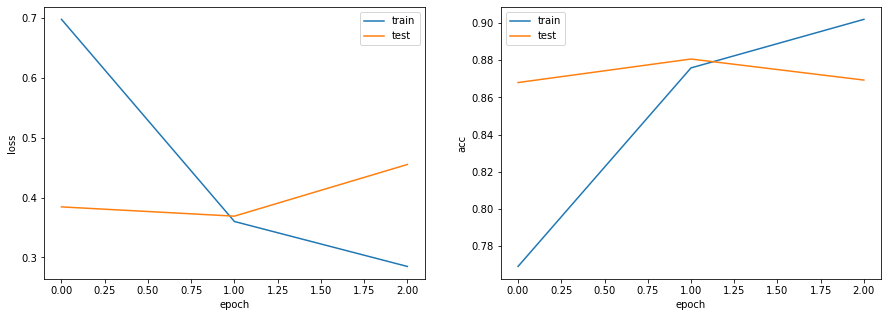

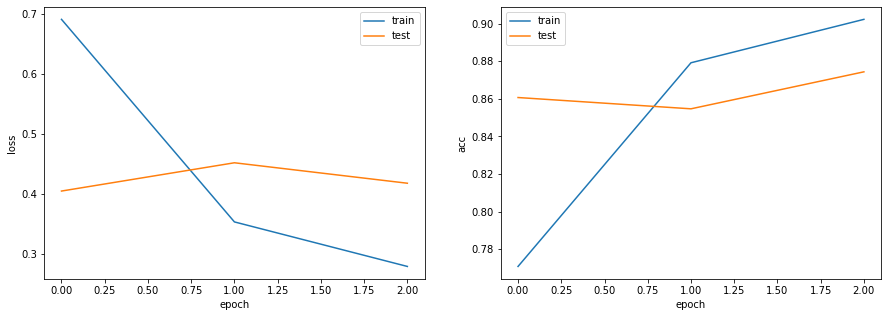

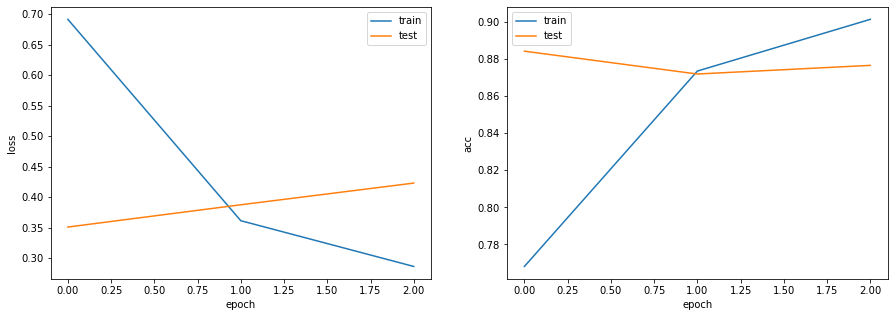

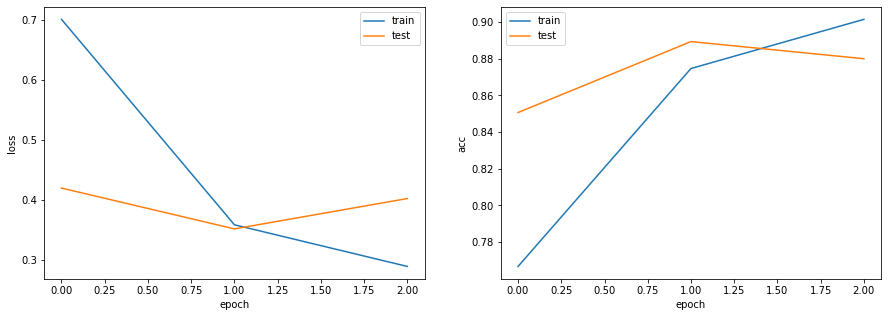

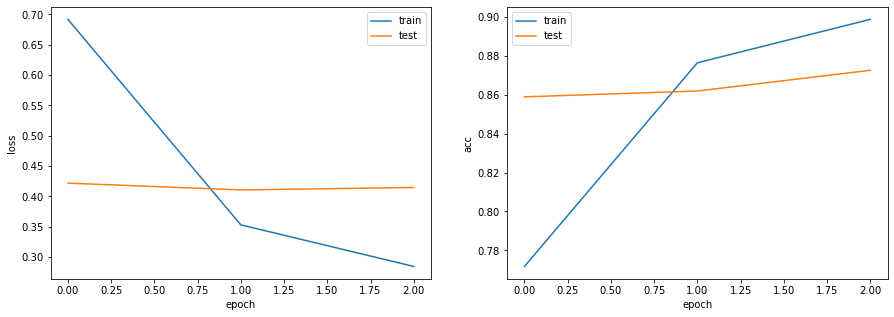

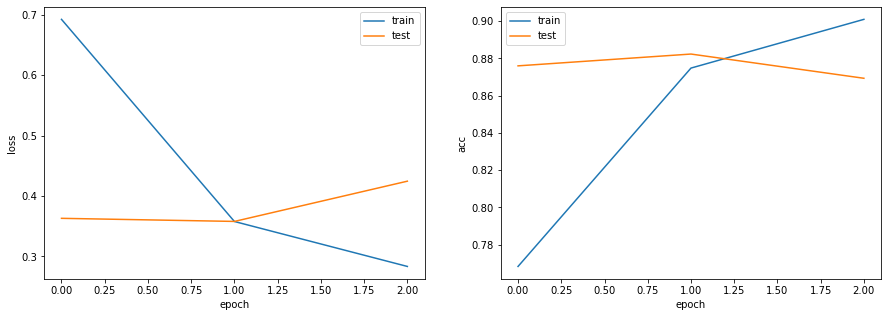

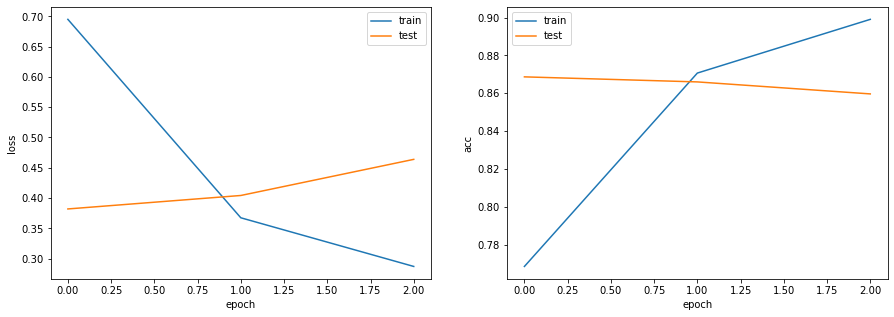

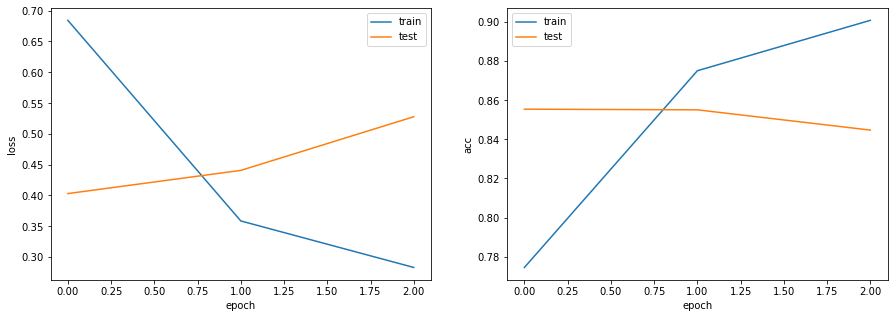

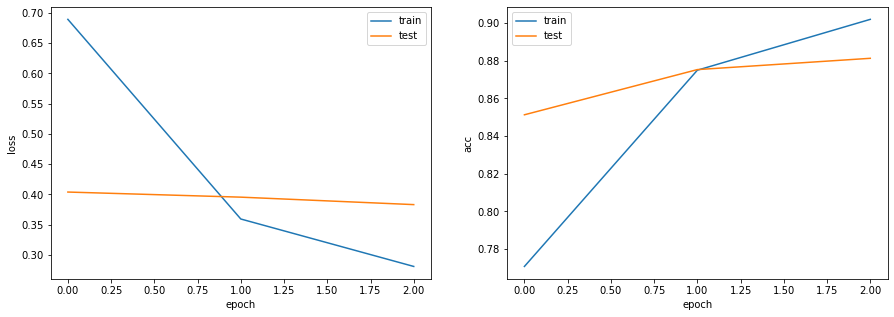

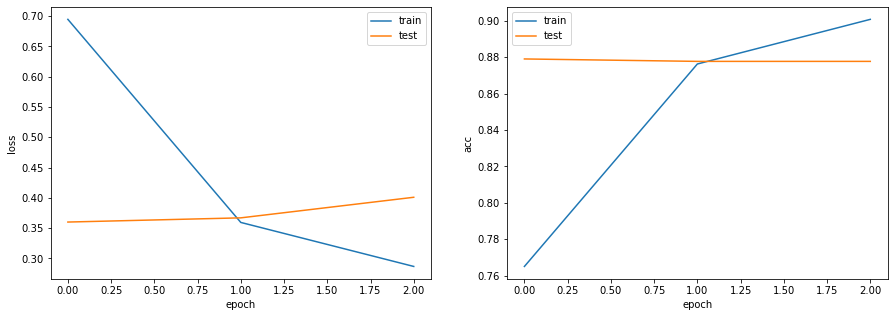

In [45]:
num_runs = 10
train_accuracy_incep_imageNet_F = []
test_accuracy_incep_imageNet_F = []
val_accuracy_incep_imageNet_F = []
predictions_incep_imageNet_F = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_incep_imageNet_F=build_model_incep_imageNet_F()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_incep_imageNet_F = model_incep_imageNet_F.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_incep_imageNet_F.append(history_incep_imageNet_F.history['acc'][-1])
    val_accuracy_incep_imageNet_F.append(history_incep_imageNet_F.history['val_acc'][-1])
    # Prediction
    prediction_incep_imageNet_F = model_incep_imageNet_F.predict(x_test)
    acc_incep_imageNet_F = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_incep_imageNet_F, axis = -1),normalize = True)
    test_accuracy_incep_imageNet_F.append(acc_incep_imageNet_F)
    predictions_incep_imageNet_F.append(prediction_incep_imageNet_F)
    print('Test accuracy: ' , round(acc_incep_imageNet_F * 100,1))
    plot_hist(history_incep_imageNet_F)
    K.clear_session()


[array([[9.9998486e-01, 9.7159667e-09, 1.2034374e-07, 2.8073627e-08,
        7.3030115e-08, 1.4917252e-05],
       [9.8854893e-01, 3.0616761e-06, 3.6865413e-06, 1.1493538e-05,
        1.8829314e-06, 1.1430904e-02],
       [9.9483091e-01, 5.8849935e-07, 7.8150315e-06, 1.4551880e-04,
        3.7689253e-07, 5.0147856e-03],
       ...,
       [2.2085871e-04, 1.5560758e-03, 3.0873052e-04, 3.0960727e-02,
        5.5933852e-02, 9.1101974e-01],
       [2.4606347e-02, 1.8931813e-06, 8.9919726e-05, 4.8585604e-05,
        7.2268131e-06, 9.7524601e-01],
       [2.0057506e-04, 9.7760731e-06, 1.8315222e-06, 5.2291153e-07,
        5.9297844e-07, 9.9978667e-01]], dtype=float32), array([[9.9997485e-01, 2.1188358e-09, 1.3761084e-07, 3.4807876e-08,
        2.8427245e-08, 2.5045329e-05],
       [9.8495287e-01, 1.7791954e-06, 4.8886714e-06, 3.6022731e-05,
        1.4414162e-06, 1.5003004e-02],
       [9.9407649e-01, 4.8889780e-07, 8.4825815e-06, 2.1450866e-04,
        1.5147702e-07, 5.6998674e-03],
       

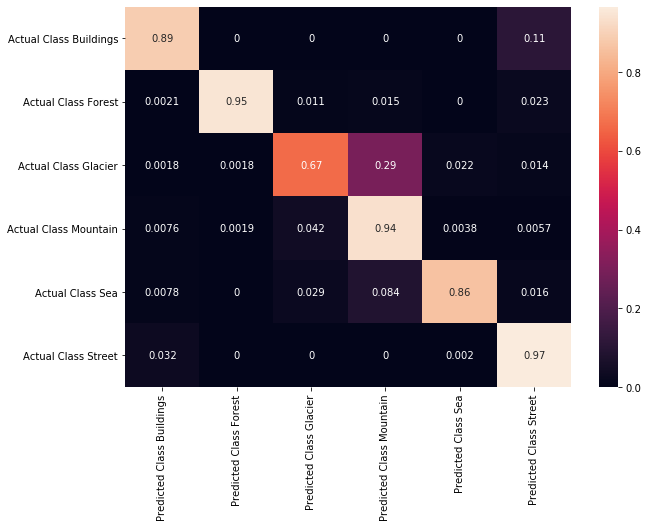

In [47]:
print(predictions_incep_imageNet_F)
# Confusion matrix, averaged over num_runs
classes = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
reverse_classes = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
class_labels = list(reverse_classes.keys())
y_pred_incep_imageNet_F = np.argmax(np.mean(predictions_incep_imageNet_F, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_incep_imageNet_F, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier',
                             'Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier',
                             'Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_incep_imageNet_F)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_incep_imageNet_F)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_incep_imageNet_F)*100, decimals =2))

# Inception ImageNet True

In [24]:
def build_model_incep_imageNet_T():
    pre_trained_model_incep_imageNet = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights = 'imagenet')
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_incep_imageNet.layers:
        layer.trainable = True
        
    last_layer = pre_trained_model_incep_imageNet.get_layer('mixed7')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_incep_imageNetT = Model(pre_trained_model_incep_imageNet.input, x)
    model_incep_imageNetT.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_incep_imageNetT

last layer output shape:  (None, 7, 7, 768)
Run  0
Epoch 1/3
878/878 [==============================] - 158s 180ms/step - loss: 0.5980 - acc: 0.7984 - val_loss: 0.2750 - val_acc: 0.9027
Epoch 2/3
878/878 [==============================] - 139s 158ms/step - loss: 0.2672 - acc: 0.9060 - val_loss: 0.2298 - val_acc: 0.9190
Epoch 3/3
878/878 [==============================] - 138s 157ms/step - loss: 0.1705 - acc: 0.9423 - val_loss: 0.2266 - val_acc: 0.9213
Test accuracy:  92.1
last layer output shape:  (None, 7, 7, 768)
Run  1
Epoch 1/3
878/878 [==============================] - 160s 182ms/step - loss: 0.5876 - acc: 0.8021 - val_loss: 0.2632 - val_acc: 0.9033
Epoch 2/3
878/878 [==============================] - 140s 160ms/step - loss: 0.2611 - acc: 0.9091 - val_loss: 0.2377 - val_acc: 0.9163
Epoch 3/3
878/878 [==============================] - 143s 163ms/step - loss: 0.1744 - acc: 0.9409 - val_loss: 0.2337 - val_acc: 0.9167
Test accuracy:  91.7
last layer output shape:  (None, 7, 7, 768)
Ru

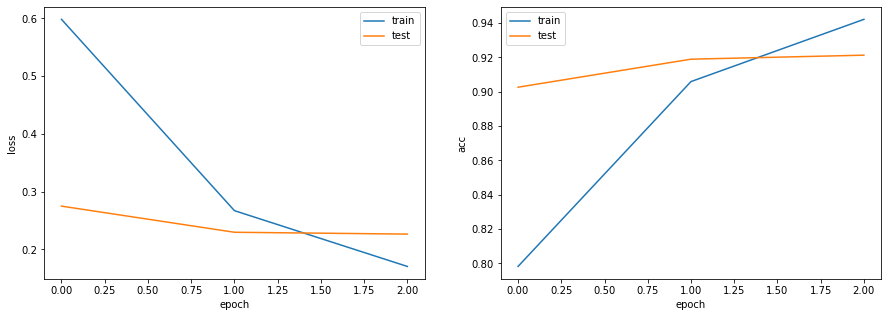

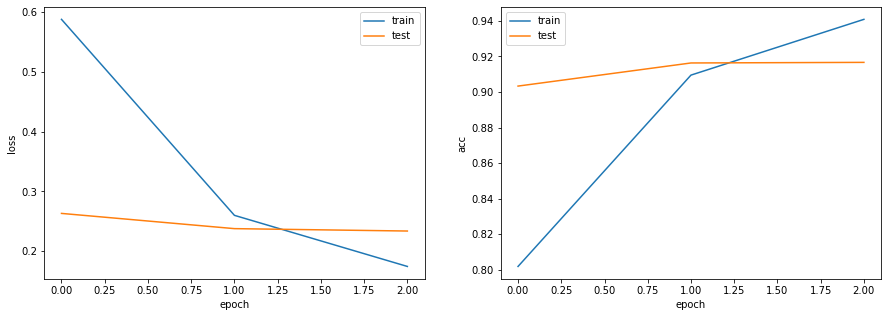

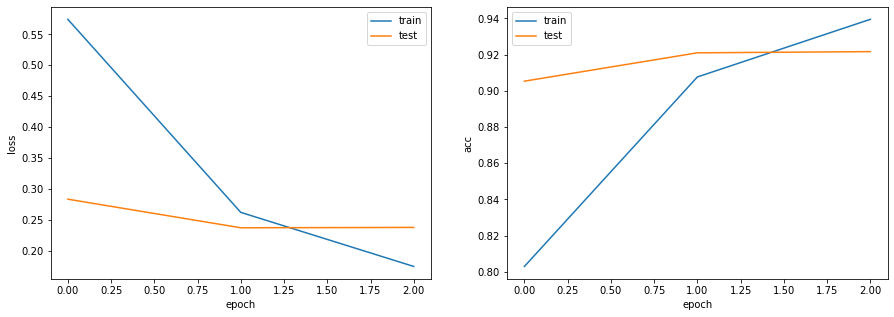

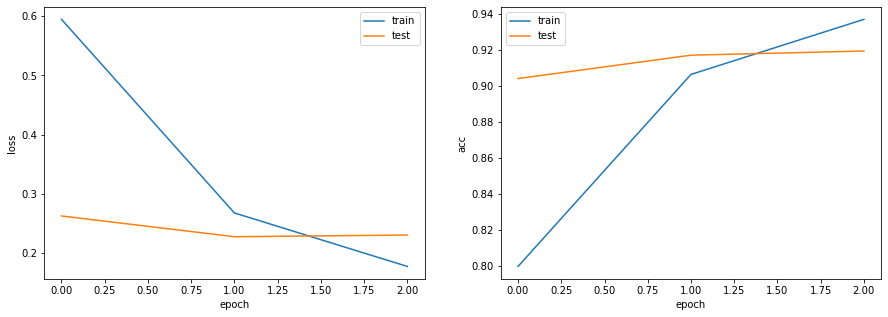

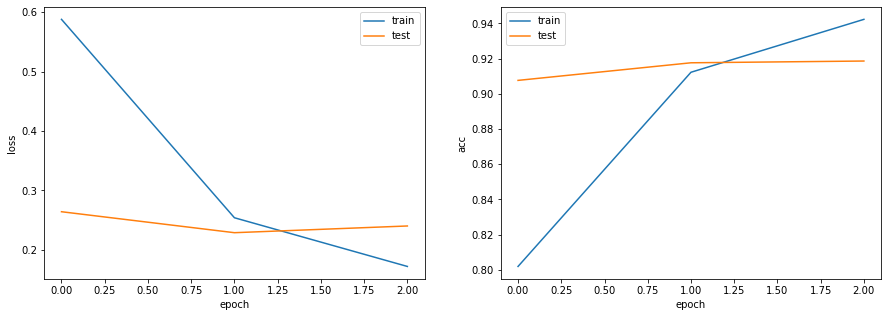

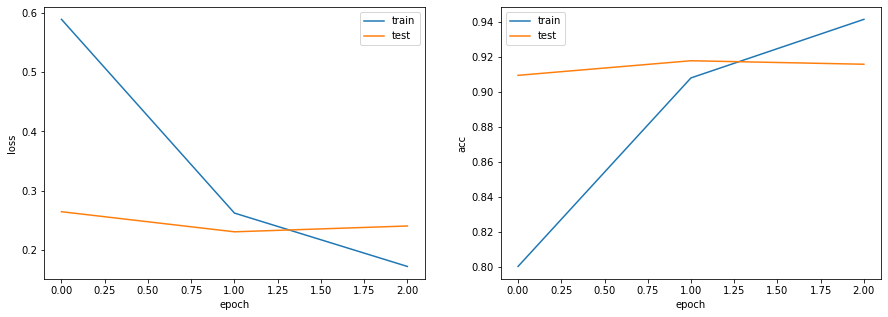

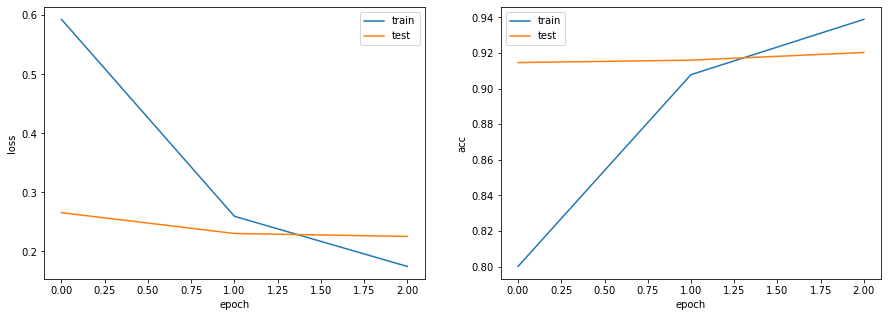

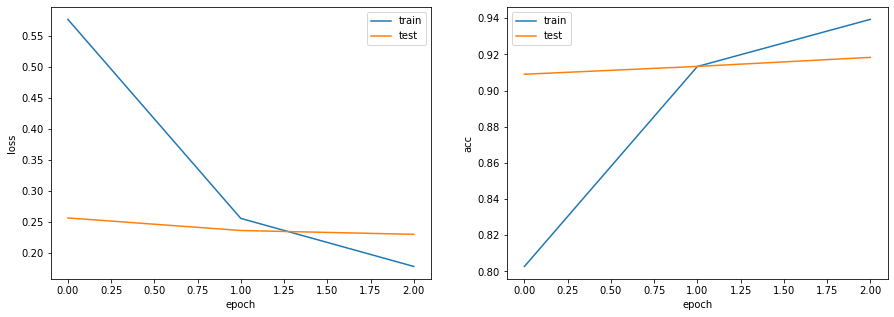

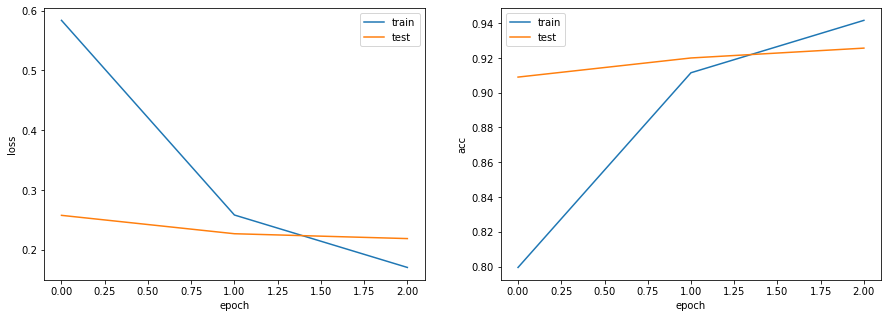

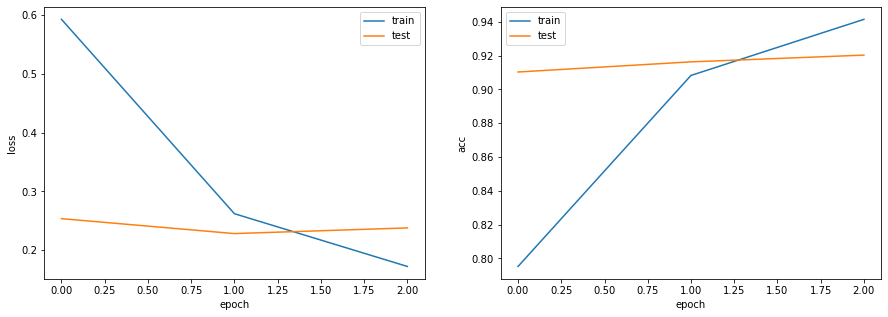

In [25]:
num_runs = 10
train_accuracy_incep_imageNet_T = []
test_accuracy_incep_imageNet_T = []
val_accuracy_incep_imageNet_T = []
predictions_incep_imageNet_T = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_incep_imageNet_T=build_model_incep_imageNet_T()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_incep_imageNet_T = model_incep_imageNet_T.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_incep_imageNet_T.append(history_incep_imageNet_T.history['acc'][-1])
    val_accuracy_incep_imageNet_T.append(history_incep_imageNet_T.history['val_acc'][-1])
    # Prediction
    prediction_incep_imageNet_T = model_incep_imageNet_T.predict(x_test)
    acc_incep_imageNet_T = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_incep_imageNet_T, axis = -1),normalize = True)
    test_accuracy_incep_imageNet_T.append(acc_incep_imageNet_T)
    predictions_incep_imageNet_T.append(prediction_incep_imageNet_T)
    print('Test accuracy: ' , round(acc_incep_imageNet_T * 100,1))
    plot_hist(history_incep_imageNet_T)
    K.clear_session()


[array([[9.9983037e-01, 6.4191443e-07, 8.2294828e-06, 2.2177210e-06,
        1.5253480e-05, 1.4328970e-04],
       [9.9173248e-01, 1.5802569e-05, 9.4713105e-05, 2.2575234e-05,
        8.7426561e-05, 8.0468412e-03],
       [9.9364436e-01, 1.9749858e-04, 2.1851306e-04, 4.2786900e-04,
        5.4737204e-04, 4.9643875e-03],
       ...,
       [5.1058203e-02, 3.7650450e-03, 8.9774076e-03, 5.0492503e-02,
        8.7827921e-01, 7.4276174e-03],
       [2.1292482e-01, 2.3365888e-04, 3.2433891e-03, 1.0145546e-03,
        5.4878142e-04, 7.8203481e-01],
       [2.6756637e-05, 2.2068227e-06, 3.4914126e-06, 1.7990334e-07,
        2.8689095e-07, 9.9996710e-01]], dtype=float32), array([[9.99003947e-01, 2.51582096e-05, 7.58270980e-05, 1.86955840e-05,
        2.51146048e-05, 8.51219927e-04],
       [9.96812284e-01, 1.27122214e-04, 1.41902347e-04, 1.78291284e-05,
        3.09942734e-05, 2.86984863e-03],
       [9.98012185e-01, 1.38565141e-04, 1.86842488e-04, 1.56050228e-04,
        1.32920322e-04, 1.3734

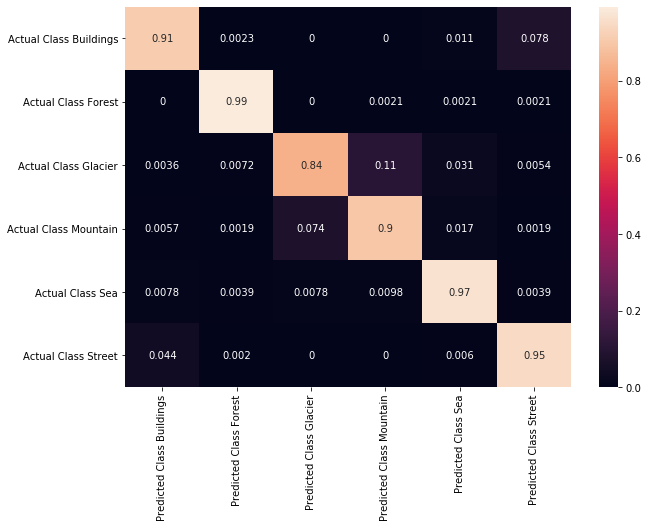

In [26]:
print(predictions_incep_imageNet_T)
# Confusion matrix, averaged over num_runs
classes = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
reverse_classes = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
class_labels = list(reverse_classes.keys())
y_pred_incep_imageNet_T = np.argmax(np.mean(predictions_incep_imageNet_T, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_incep_imageNet_T, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier',
                             'Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier',
                             'Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_incep_imageNet_T)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_incep_imageNet_T)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_incep_imageNet_T)*100, decimals =2))

In [ ]:
def plot_hist_precise(history):
    # your code here
    fig, axs = plt.subplots(1,2, figsize=(15,5))

    for i, to_plot in enumerate(['loss', 'acc']):
        axs[i].plot(history.history[f'{to_plot}'], label='train')
        axs[i].plot(history.history[f'val_{to_plot}'], label='test')
        axs[i].set_ylabel(to_plot)
        axs[i].set_xlabel('epoch')
        axs[i].legend()

## Inception-V3, validation accuracy is 88.22%

# XCEPTION :

# Xception is based on the Inception-V3 model, mainly using Modified Depthwise Separable Convolution to replace convolution in Inception-V3

## What the Inception thought was, having filters with different size. And inspired by this, in the following picture, every 3x3 conv takes 1/3 channel as its input.

![title](img/bb.png)

## Let's do a little math on the number of parameters

## Assume that every 1x1 conv have k1 numbers of kernel, and every 3x3 conv have k2 number of kernel, and we have M channels, so the total parameter will be= m * k1 +   k1/3 * k2 * 3 * 3 = m * k1 + 3 * k1 * k2

## Then there comes the ultimate version

![title](img/bbb.png)

# Modified Depthwise Separable Convolution in Xception

![title](img/ccc.png)

# "The modified depthwise separable convolution is the pointwise convolution followed by a depthwise convolution."

# Let's do some math!

## Suppose it's a 5x5x3 input picture

# Convolution

![title](img/acd.jpg)

## Number of para in convolution layer: 4 x 3 x 3 x 3 = 108

# Pointwise Convolution

![title](img/ac.png)

## Number of para in convolution layer: 1 x 1 x 3 x 4 = 12

# Depthwise Convolution

![title](img/ca.png)

## Number of para in convolution layer: 3 x 3 x 3 = 27

## Number of para in Seperable convolution layer: 27 + 12 = 39
### Therefore, when a Depthwise Seperable Neural Network have the same number of parameter with a convolution neural network, the Depthwise Seperable Neural Network are always deeper

# Structure of Xception

![title](img/Xception.png)

## Xception Model with Pretrained Weight

## Set the layers.trainable to false so that it will not forget the weights gained from pretraining. Then we pass the feature to 2 fully connected layers, (with Dropout) and apply softmax for the prediction. Train for 12 epochs

# Xception None False

In [25]:
def build_model_xcep_random_F():
    pre_trained_model_xcep_random = Xception(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights=None)
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_xcep_random.layers:
        layer.trainable = False
        
    last_layer = pre_trained_model_xcep_random.get_layer('block14_sepconv1')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_xcep_randomF = Model(pre_trained_model_xcep_random.input, x)
    model_xcep_randomF.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_xcep_randomF

last layer output shape:  (None, 5, 5, 1536)
Run  0
Epoch 1/3
878/878 [==============================] - 193s 219ms/step - loss: 1.1967 - acc: 0.5530 - val_loss: 1.7881 - val_acc: 0.2723
Epoch 2/3
878/878 [==============================] - 73s 83ms/step - loss: 0.9555 - acc: 0.6499 - val_loss: 1.7872 - val_acc: 0.2727
Epoch 3/3
878/878 [==============================] - 73s 83ms/step - loss: 0.8650 - acc: 0.6849 - val_loss: 1.7867 - val_acc: 0.2713
Test accuracy:  27.1
last layer output shape:  (None, 5, 5, 1536)
Run  1
Epoch 1/3
878/878 [==============================] - 81s 93ms/step - loss: 1.1992 - acc: 0.5626 - val_loss: 1.7869 - val_acc: 0.2487
Epoch 2/3
878/878 [==============================] - 74s 84ms/step - loss: 0.9348 - acc: 0.6573 - val_loss: 1.7855 - val_acc: 0.2303
Epoch 3/3
878/878 [==============================] - 74s 84ms/step - loss: 0.8557 - acc: 0.6863 - val_loss: 1.7846 - val_acc: 0.2397
Test accuracy:  24.0
last layer output shape:  (None, 5, 5, 1536)
Run  2
Ep

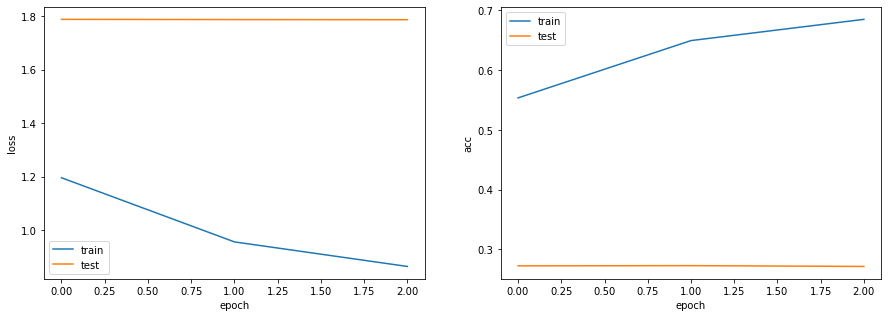

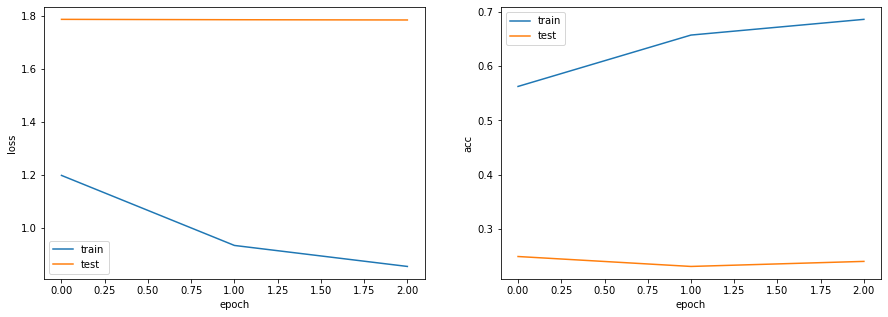

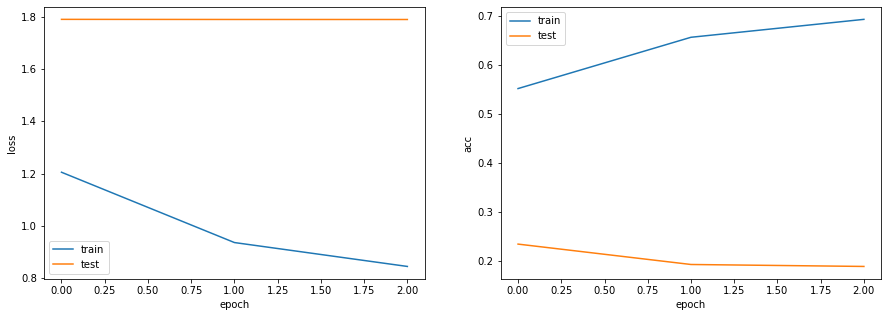

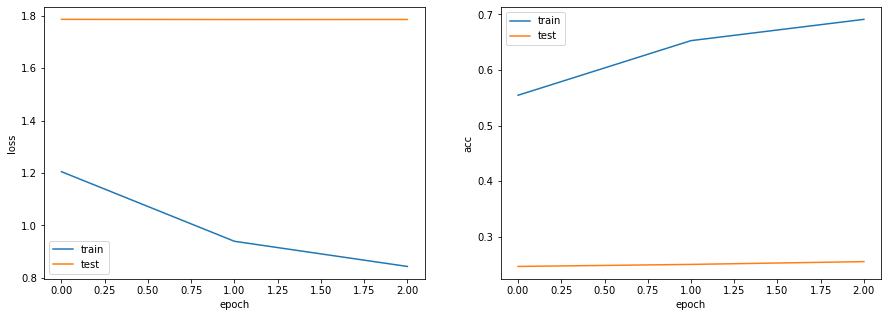

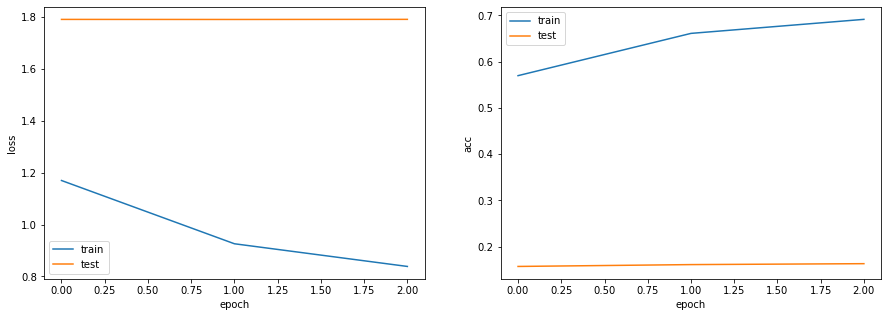

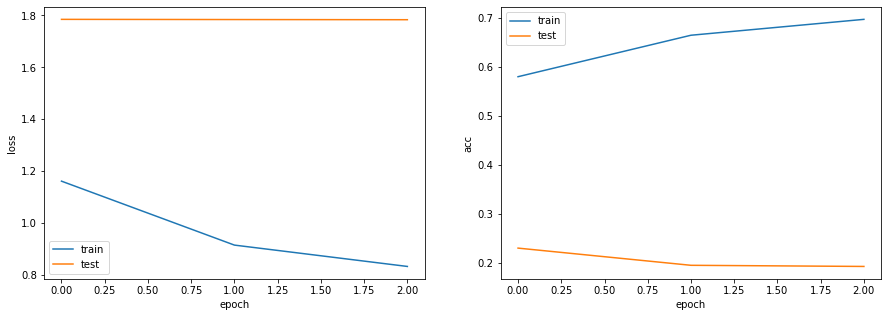

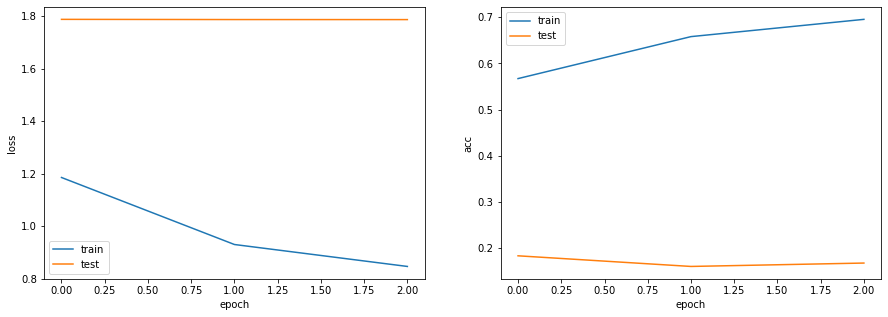

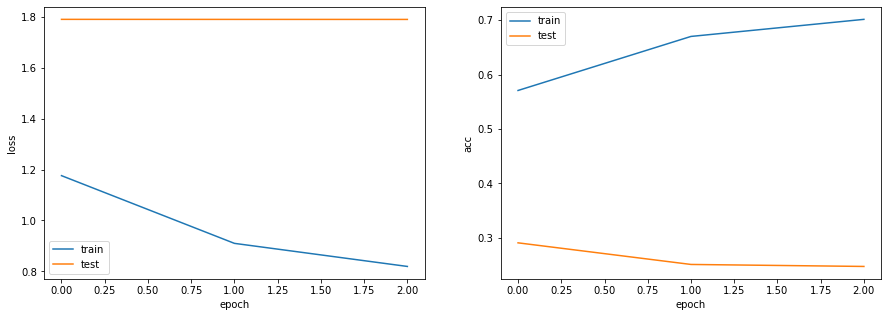

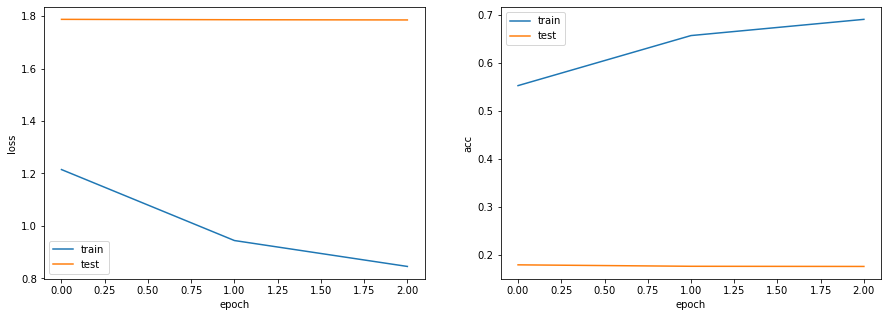

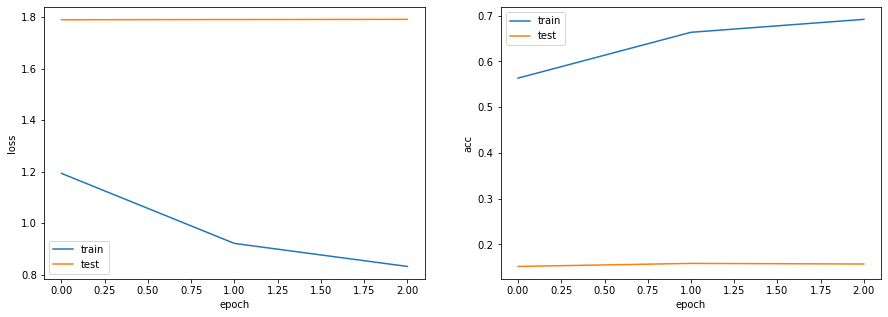

In [27]:
num_runs = 10
train_accuracy_xcep_random_F = []
test_accuracy_xcep_random_F = []
val_accuracy_xcep_random_F = []
predictions_xcep_random_F = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_xcep_random_F=build_model_xcep_random_F()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_xcep_random_F = model_xcep_random_F.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_xcep_random_F.append(history_xcep_random_F.history['acc'][-1])
    val_accuracy_xcep_random_F.append(history_xcep_random_F.history['val_acc'][-1])
    # Prediction
    prediction_xcep_random_F = model_xcep_random_F.predict(x_test)
    acc_xcep_random_F = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_xcep_random_F, axis = -1),normalize = True)
    test_accuracy_xcep_random_F.append(acc_xcep_random_F)
    predictions_xcep_random_F.append(prediction_xcep_random_F)
    print('Test accuracy: ' , round(acc_xcep_random_F * 100,1))
    plot_hist(history_xcep_random_F)
    K.clear_session()


[array([[0.16732855, 0.16323298, 0.17050546, 0.17058294, 0.16561677,
        0.16273336],
       [0.16628158, 0.16340508, 0.17039315, 0.17091575, 0.16550343,
        0.163501  ],
       [0.16777118, 0.16313523, 0.16793714, 0.17149092, 0.16579391,
        0.16387162],
       ...,
       [0.16639213, 0.16334632, 0.16894662, 0.17030755, 0.16593838,
        0.16506898],
       [0.16634049, 0.16367255, 0.17059824, 0.17010331, 0.16567127,
        0.16361417],
       [0.16643937, 0.16512899, 0.170343  , 0.16745894, 0.16627   ,
        0.16435975]], dtype=float32), array([[0.1678355 , 0.15869747, 0.17520761, 0.17275588, 0.16427821,
        0.16122524],
       [0.16694166, 0.1597256 , 0.1748735 , 0.17182358, 0.16408996,
        0.16254559],
       [0.16873127, 0.15874353, 0.17346989, 0.1735816 , 0.16362461,
        0.16184907],
       ...,
       [0.16619883, 0.16165535, 0.17251512, 0.17315063, 0.16475055,
        0.16172944],
       [0.16696383, 0.15946501, 0.1745541 , 0.17240906, 0.16427416,


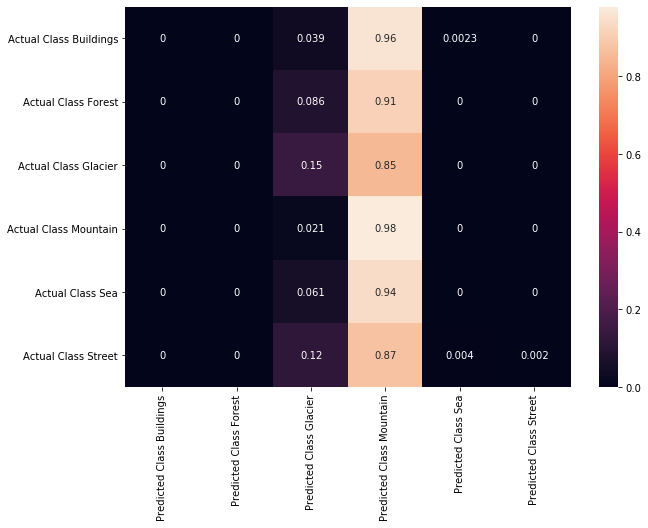

In [28]:
print(predictions_xcep_random_F)
# Confusion matrix, averaged over num_runs
classes = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
reverse_classes = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
class_labels = list(reverse_classes.keys())
y_pred_xcep_random_F = np.argmax(np.mean(predictions_xcep_random_F, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_xcep_random_F, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier',
                             'Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier',
                             'Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_xcep_random_F)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_xcep_random_F)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_xcep_random_F)*100, decimals =2))

# Xception None True

In [29]:
def build_model_xcep_random_T():
    pre_trained_model_xcep_random = Xception(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights=None)
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_xcep_random.layers:
        layer.trainable = True
        
    last_layer = pre_trained_model_xcep_random.get_layer('block14_sepconv1')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_xcep_randomT = Model(pre_trained_model_xcep_random.input, x)
    model_xcep_randomT.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_xcep_randomT

last layer output shape:  (None, 5, 5, 1536)
Run  0
Epoch 1/3
878/878 [==============================] - 226s 257ms/step - loss: 1.0171 - acc: 0.6214 - val_loss: 0.7973 - val_acc: 0.7080
Epoch 2/3
878/878 [==============================] - 203s 231ms/step - loss: 0.6684 - acc: 0.7558 - val_loss: 0.6574 - val_acc: 0.7590
Epoch 3/3
878/878 [==============================] - 208s 236ms/step - loss: 0.5303 - acc: 0.8072 - val_loss: 0.6416 - val_acc: 0.7677
Test accuracy:  76.8
last layer output shape:  (None, 5, 5, 1536)
Run  1
Epoch 1/3
878/878 [==============================] - 229s 261ms/step - loss: 1.0368 - acc: 0.6130 - val_loss: 0.7629 - val_acc: 0.7153
Epoch 2/3
878/878 [==============================] - 208s 237ms/step - loss: 0.6853 - acc: 0.7442 - val_loss: 0.6161 - val_acc: 0.7737
Epoch 3/3
878/878 [==============================] - 206s 235ms/step - loss: 0.5308 - acc: 0.8084 - val_loss: 0.5891 - val_acc: 0.7840
Test accuracy:  78.4
last layer output shape:  (None, 5, 5, 1536)

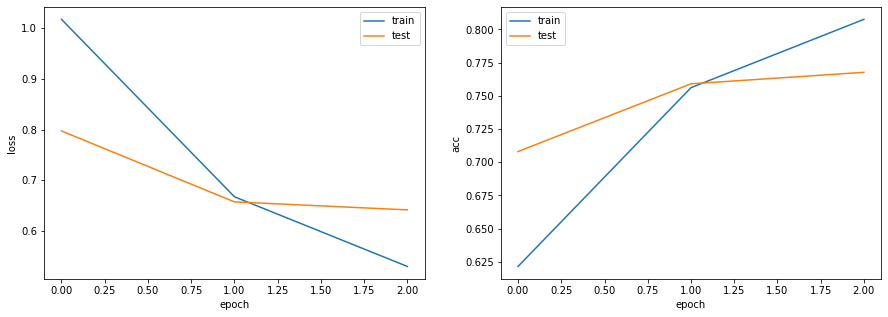

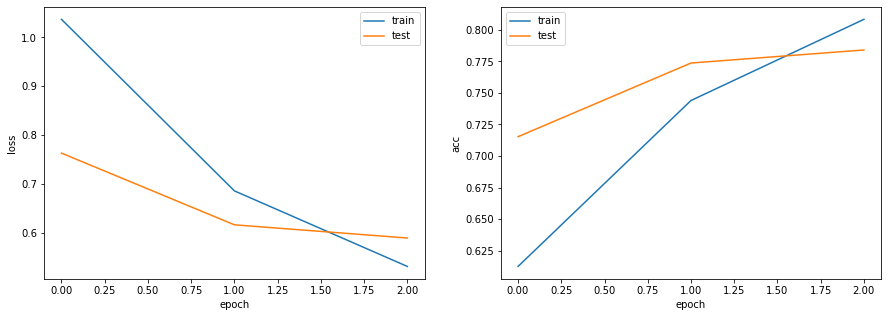

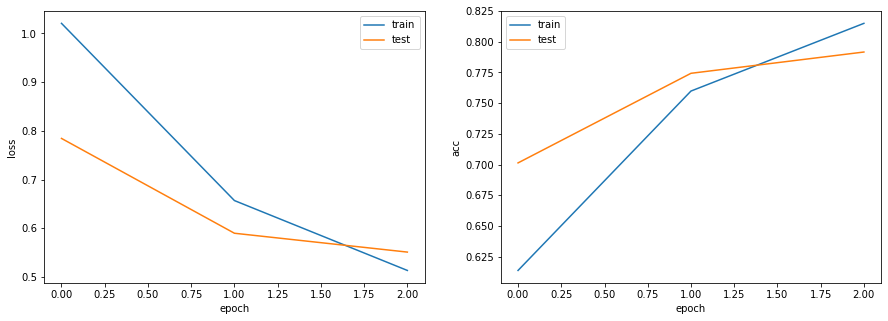

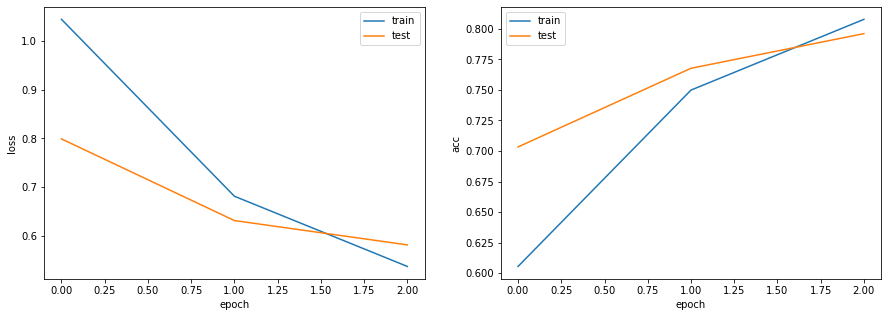

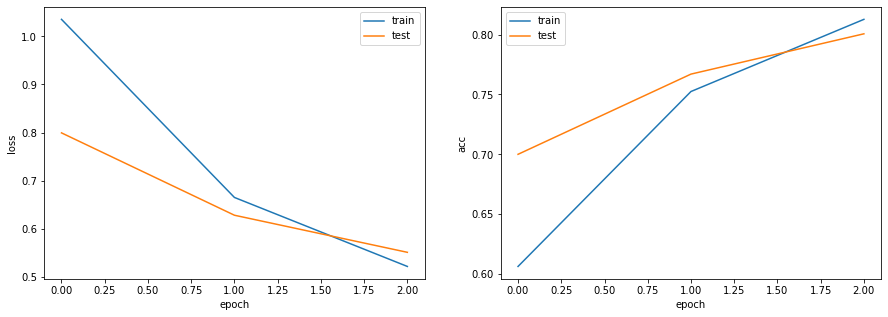

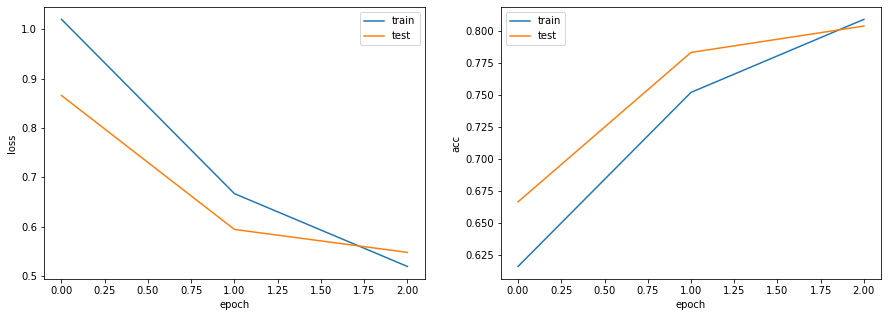

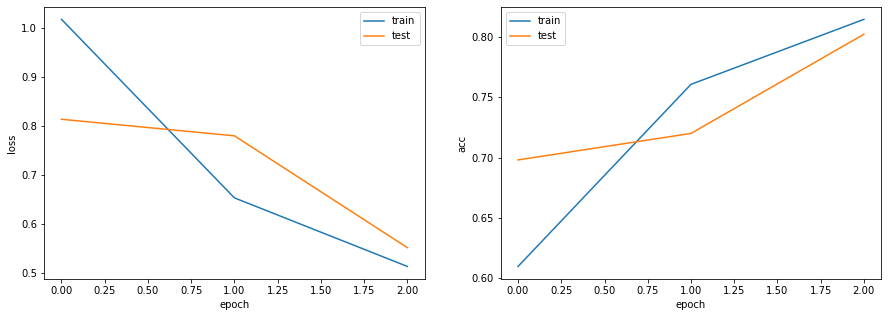

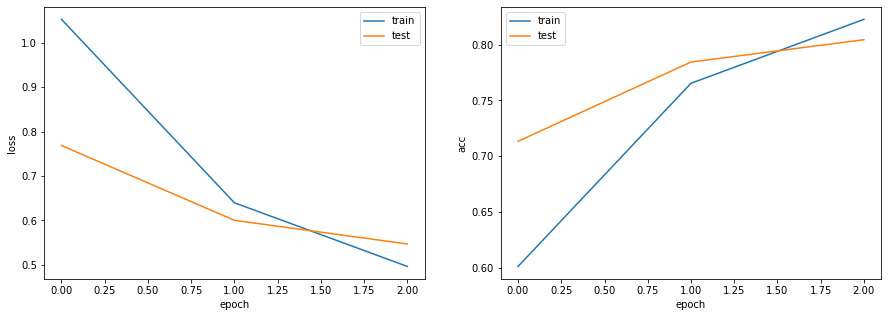

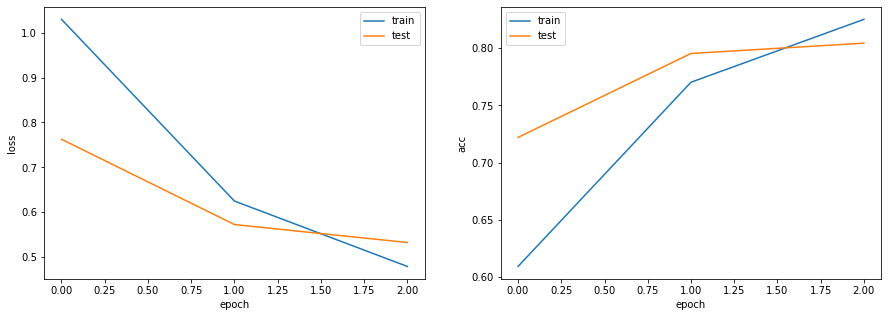

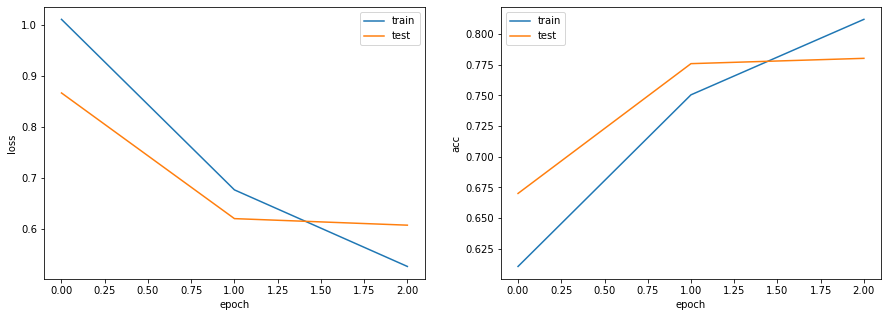

In [30]:
num_runs = 10
train_accuracy_xcep_random_T = []
test_accuracy_xcep_random_T = []
val_accuracy_xcep_random_T = []
predictions_xcep_random_T = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_xcep_random_T=build_model_xcep_random_T()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_xcep_random_T = model_xcep_random_T.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_xcep_random_T.append(history_xcep_random_T.history['acc'][-1])
    val_accuracy_xcep_random_T.append(history_xcep_random_T.history['val_acc'][-1])
    # Prediction
    prediction_xcep_random_T = model_xcep_random_T.predict(x_test)
    acc_xcep_random_T = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_xcep_random_T, axis = -1),normalize = True)
    test_accuracy_xcep_random_T.append(acc_xcep_random_T)
    predictions_xcep_random_T.append(prediction_xcep_random_T)
    print('Test accuracy: ' , round(acc_xcep_random_T * 100,1))
    plot_hist(history_xcep_random_T)
    K.clear_session()


[array([[9.7123230e-01, 2.2394257e-04, 1.5438286e-03, 3.1349608e-03,
        1.9643648e-02, 4.2213257e-03],
       [6.3431758e-01, 9.1110440e-03, 2.3505680e-02, 4.7120140e-03,
        9.0880683e-03, 3.1926554e-01],
       [9.4813323e-01, 9.8072414e-05, 1.5796952e-04, 2.0029260e-04,
        1.1659540e-03, 5.0244331e-02],
       ...,
       [2.0678840e-03, 8.1152562e-04, 7.0763458e-03, 9.4830698e-01,
        4.1529335e-02, 2.0804745e-04],
       [9.0169758e-01, 4.0309047e-04, 5.2102106e-03, 5.0621061e-03,
        3.8496118e-02, 4.9130972e-02],
       [8.1827343e-03, 3.4431678e-03, 1.1653280e-04, 3.5220128e-05,
        6.8695110e-05, 9.8815364e-01]], dtype=float32), array([[9.8491490e-01, 2.2148667e-04, 1.3660860e-03, 2.3747848e-03,
        3.7190402e-03, 7.4038375e-03],
       [6.3159180e-01, 2.1650284e-03, 4.7410298e-02, 9.4353668e-03,
        2.1642257e-01, 9.2974976e-02],
       [9.2363578e-01, 7.3504646e-04, 1.1012577e-03, 3.0161487e-03,
        1.4663803e-03, 7.0045359e-02],
       

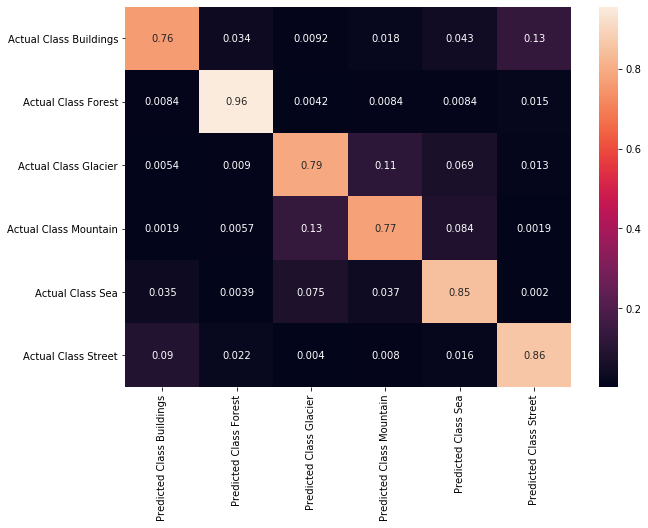

In [32]:
print(predictions_xcep_random_T)
# Confusion matrix, averaged over num_runs
classes = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
reverse_classes = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
class_labels = list(reverse_classes.keys())
y_pred_xcep_random_T = np.argmax(np.mean(predictions_xcep_random_T, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_xcep_random_T, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier',
                             'Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier',
                             'Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_xcep_random_T)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_xcep_random_T)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_xcep_random_T)*100, decimals =2))

# Xception ImageNet False

In [33]:
def build_model_xcep_imageNet_F():
    pre_trained_model_xcep_imageNet = Xception(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights='imagenet')
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_xcep_imageNet.layers:
        layer.trainable = False
        
    last_layer = pre_trained_model_xcep_imageNet.get_layer('block14_sepconv1')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_xcep_imageNetF = Model(pre_trained_model_xcep_imageNet.input, x)
    model_xcep_imageNetF.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_xcep_imageNetF

last layer output shape:  (None, 5, 5, 1536)
Run  0
Epoch 1/3
878/878 [==============================] - 79s 90ms/step - loss: 0.7482 - acc: 0.7849 - val_loss: 0.3613 - val_acc: 0.8773
Epoch 2/3
878/878 [==============================] - 74s 85ms/step - loss: 0.4421 - acc: 0.8570 - val_loss: 0.3741 - val_acc: 0.8667
Epoch 3/3
878/878 [==============================] - 75s 85ms/step - loss: 0.3822 - acc: 0.8695 - val_loss: 0.3451 - val_acc: 0.8757
Test accuracy:  87.6
last layer output shape:  (None, 5, 5, 1536)
Run  1
Epoch 1/3
878/878 [==============================] - 77s 88ms/step - loss: 0.6952 - acc: 0.7869 - val_loss: 0.3663 - val_acc: 0.8667
Epoch 2/3
878/878 [==============================] - 72s 82ms/step - loss: 0.4297 - acc: 0.8555 - val_loss: 0.3298 - val_acc: 0.8793
Epoch 3/3
878/878 [==============================] - 72s 82ms/step - loss: 0.3710 - acc: 0.8702 - val_loss: 0.3019 - val_acc: 0.8950
Test accuracy:  89.5
last layer output shape:  (None, 5, 5, 1536)
Run  2
Epoc

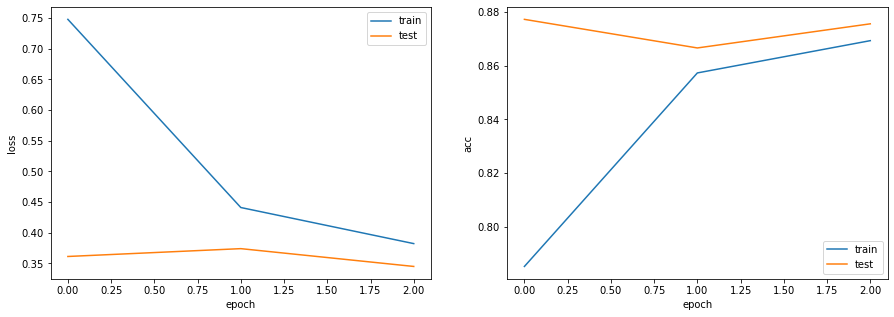

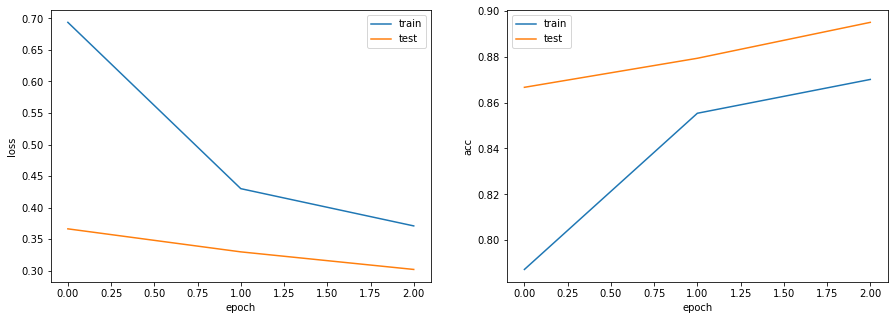

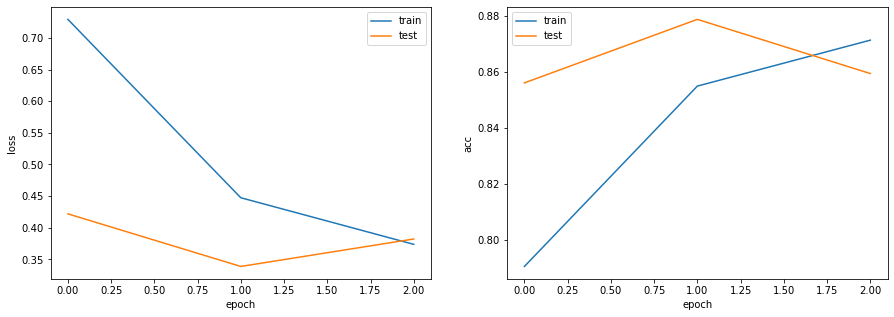

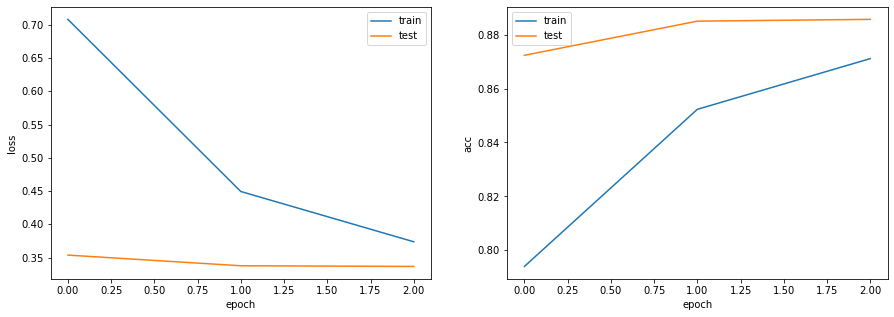

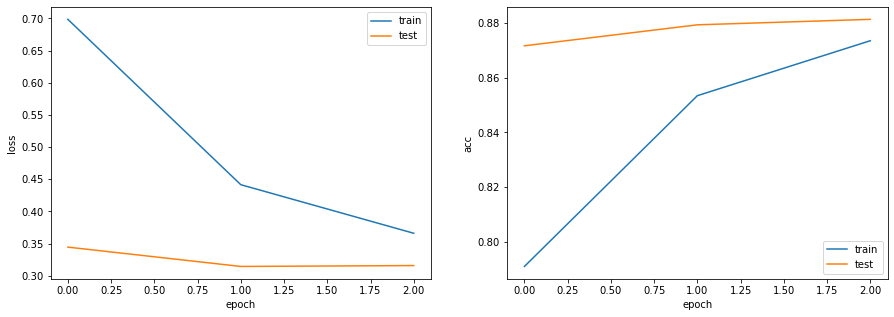

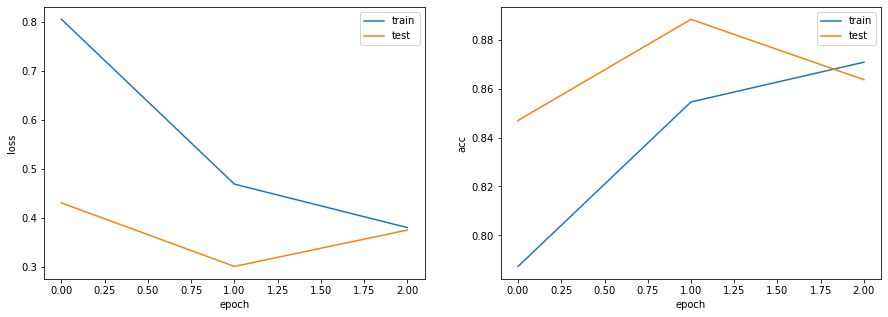

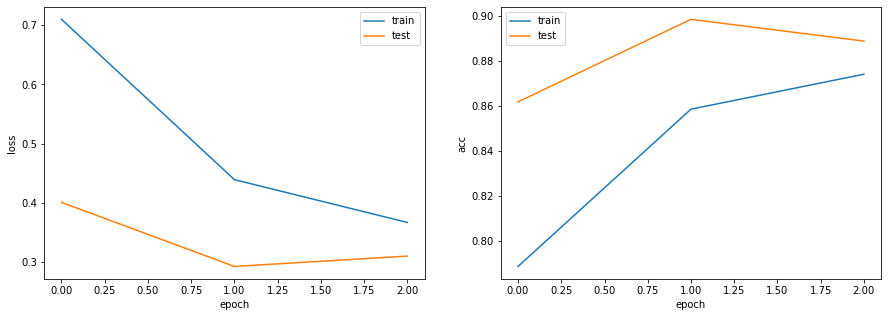

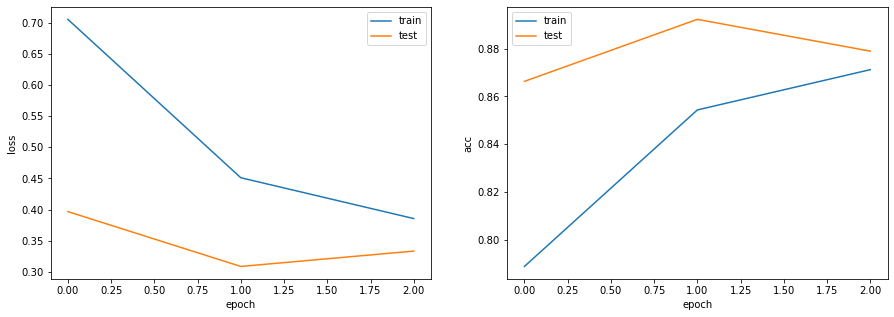

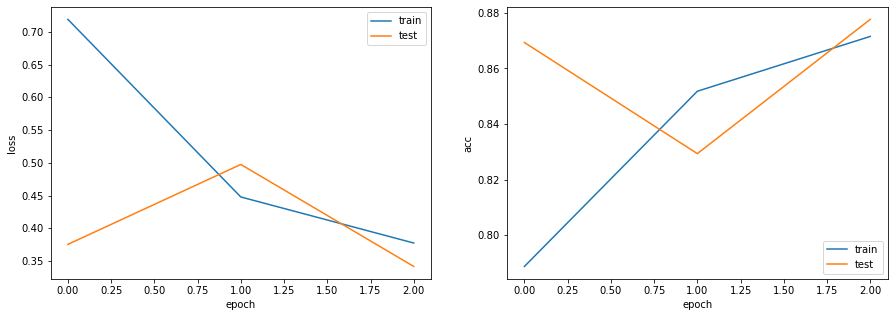

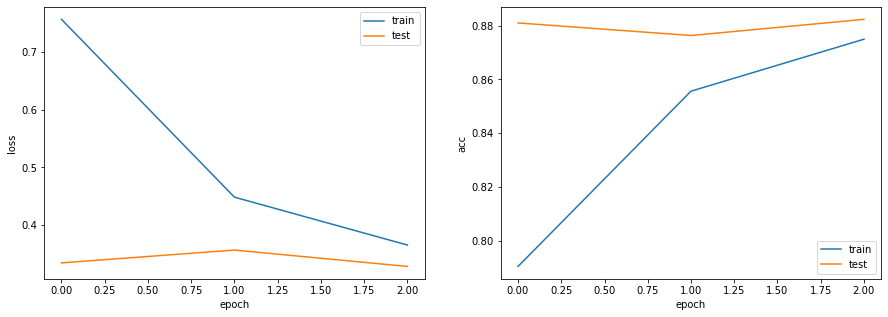

In [34]:
num_runs = 10
train_accuracy_xcep_imageNet_F = []
test_accuracy_xcep_imageNet_F = []
val_accuracy_xcep_imageNet_F = []
predictions_xcep_imageNet_F = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_xcep_imageNet_F=build_model_xcep_imageNet_F()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_xcep_imageNet_F = model_xcep_imageNet_F.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_xcep_imageNet_F.append(history_xcep_imageNet_F.history['acc'][-1])
    val_accuracy_xcep_imageNet_F.append(history_xcep_imageNet_F.history['val_acc'][-1])
    # Prediction
    prediction_xcep_imageNet_F = model_xcep_imageNet_F.predict(x_test)
    acc_xcep_imageNet_F = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_xcep_imageNet_F, axis = -1),normalize = True)
    test_accuracy_xcep_imageNet_F.append(acc_xcep_imageNet_F)
    predictions_xcep_imageNet_F.append(prediction_xcep_imageNet_F)
    print('Test accuracy: ' , round(acc_xcep_imageNet_F * 100,1))
    plot_hist(history_xcep_imageNet_F)
    K.clear_session()


[array([[9.99996781e-01, 3.53542298e-08, 5.57058229e-07, 8.19410388e-08,
        5.95924021e-08, 2.45900264e-06],
       [9.17408288e-01, 6.44505417e-05, 2.76785839e-04, 2.14060230e-04,
        4.02281497e-04, 8.16342756e-02],
       [9.99998808e-01, 7.63462538e-09, 1.17085674e-09, 2.09818696e-09,
        9.91304150e-10, 1.21326491e-06],
       ...,
       [1.20293377e-02, 4.96009504e-03, 7.57751465e-02, 3.76172274e-01,
        3.09372414e-03, 5.27969420e-01],
       [3.91729802e-01, 2.25461790e-05, 1.43484896e-04, 3.06706672e-04,
        5.51686244e-05, 6.07742250e-01],
       [2.47734170e-02, 2.75928778e-06, 5.07033917e-07, 1.01325874e-07,
        2.98688065e-06, 9.75220203e-01]], dtype=float32), array([[9.9999535e-01, 3.5473064e-08, 1.4151635e-06, 1.1486117e-07,
        1.4854342e-06, 1.6594272e-06],
       [6.2101179e-01, 2.3509725e-05, 3.2234061e-04, 4.7913892e-04,
        7.2530203e-04, 3.7743795e-01],
       [9.9999619e-01, 5.5253601e-08, 4.3153275e-08, 8.1875996e-08,
        1.

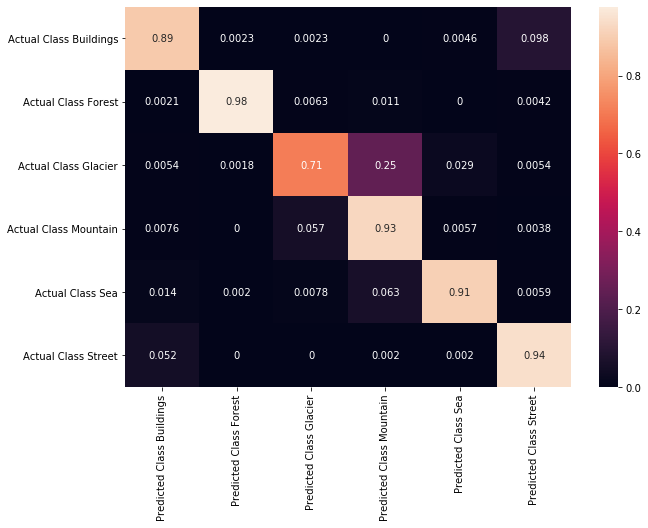

In [35]:
print(predictions_xcep_imageNet_F)
# Confusion matrix, averaged over num_runs
classes = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
reverse_classes = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
class_labels = list(reverse_classes.keys())
y_pred_xcep_imageNet_F = np.argmax(np.mean(predictions_xcep_imageNet_F, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_xcep_imageNet_F, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier',
                             'Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier',
                             'Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_xcep_imageNet_F)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_xcep_imageNet_F)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_xcep_imageNet_F)*100, decimals =2))

# Xception ImageNet True

In [21]:
def build_model_xcep_imageNet_T():
    pre_trained_model_xcep_imageNet = Xception(input_shape = (150, 150, 3), 
                                include_top = False,
                                weights = 'imagenet')
    #pre_trained_model.summary()
    
    for layer in pre_trained_model_xcep_imageNet.layers:
        layer.trainable = True
        
    last_layer = pre_trained_model_xcep_imageNet.get_layer('block14_sepconv1')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output

    x = layers.Flatten()(last_output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) 
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)  
    x = layers.Dense(6, activation='softmax')(x)           

    
    model_xcep_imageNetT = Model(pre_trained_model_xcep_imageNet.input, x)
    model_xcep_imageNetT.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics = ['acc'])
    return model_xcep_imageNetT

last layer output shape:  (None, 5, 5, 1536)
Run  0
Epoch 1/3
878/878 [==============================] - 398s 453ms/step - loss: 0.6362 - acc: 0.8189 - val_loss: 0.3375 - val_acc: 0.9043
Epoch 2/3
878/878 [==============================] - 202s 230ms/step - loss: 0.3147 - acc: 0.8972 - val_loss: 0.2604 - val_acc: 0.9150
Epoch 3/3
878/878 [==============================] - 205s 233ms/step - loss: 0.2359 - acc: 0.9221 - val_loss: 0.2802 - val_acc: 0.9137
Test accuracy:  91.4
last layer output shape:  (None, 5, 5, 1536)
Run  1
Epoch 1/3
878/878 [==============================] - 217s 248ms/step - loss: 0.6110 - acc: 0.8165 - val_loss: 0.2832 - val_acc: 0.9083
Epoch 2/3
878/878 [==============================] - 198s 225ms/step - loss: 0.2928 - acc: 0.9070 - val_loss: 0.2764 - val_acc: 0.9097
Epoch 3/3
878/878 [==============================] - 198s 226ms/step - loss: 0.2261 - acc: 0.9233 - val_loss: 0.3015 - val_acc: 0.9180
Test accuracy:  91.8
last layer output shape:  (None, 5, 5, 1536)

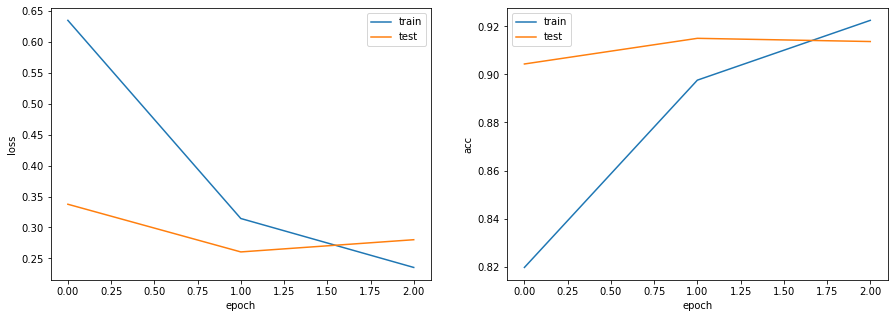

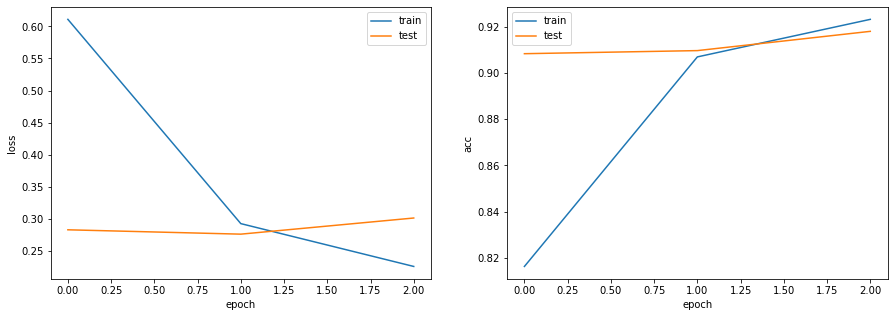

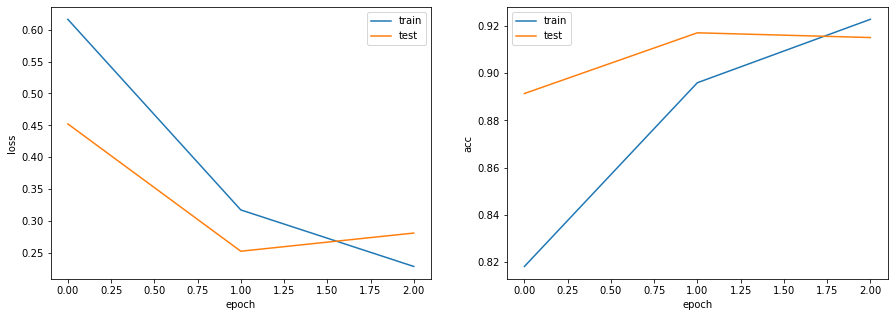

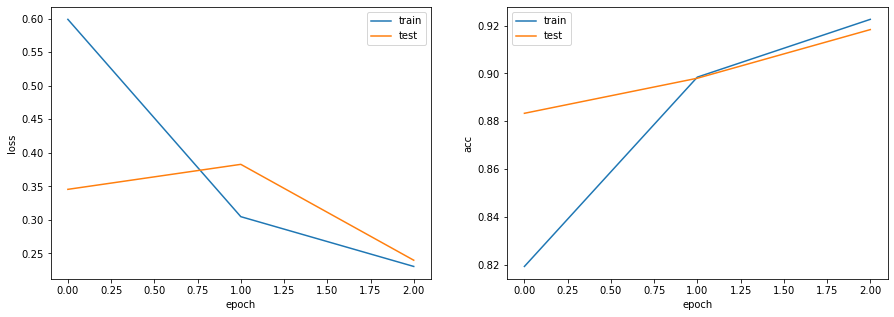

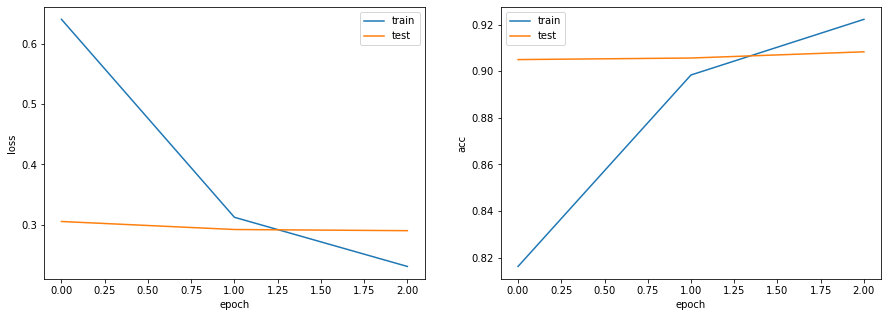

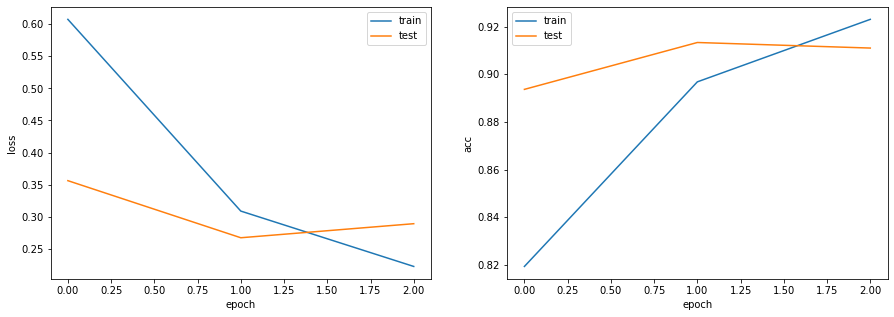

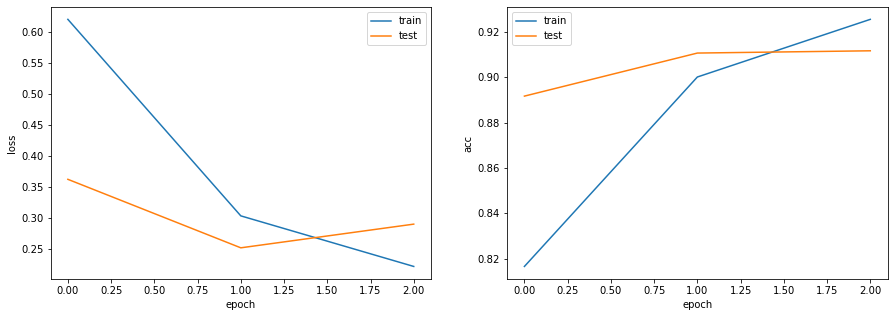

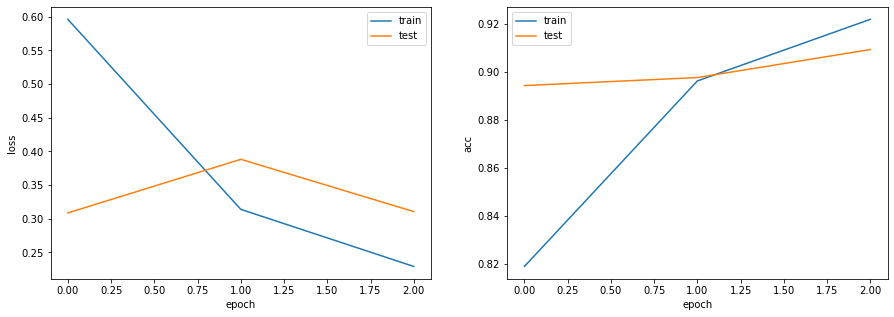

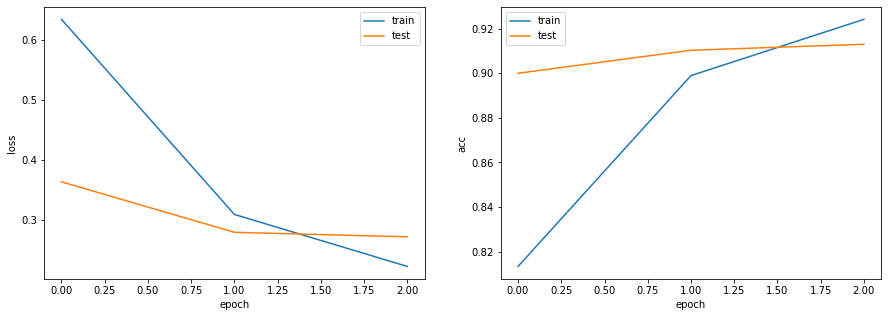

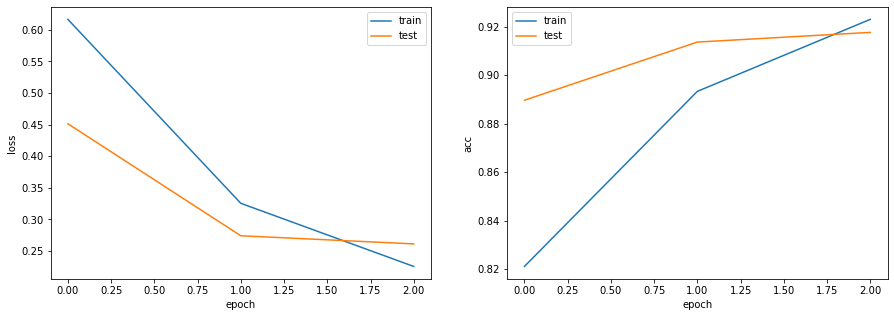

In [22]:
num_runs = 10
train_accuracy_xcep_imageNet_T = []
test_accuracy_xcep_imageNet_T = []
val_accuracy_xcep_imageNet_T = []
predictions_xcep_imageNet_T = []

tb_log_dir = 'logs'
# Tensorboard and Checkpoints
clear_folder(tb_log_dir)
tensorboard = TensorBoard(log_dir=tb_log_dir)
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy', verbose=1)

#x_test_categorical = keras.utils.to_categorical(x_test)
y_test1_categorical = keras.utils.to_categorical(y_test)

# Training

for i in range(num_runs):
    model_xcep_imageNet_T=build_model_xcep_imageNet_T()
    print('Run ', i)
    tensorboard = TensorBoard(log_dir=tb_log_dir + '/run_'+ str(i))
    history_xcep_imageNet_T = model_xcep_imageNet_T.fit_generator(
         train_gen,
         epochs=3,
         validation_data=test_gen)
    train_accuracy_xcep_imageNet_T.append(history_xcep_imageNet_T.history['acc'][-1])
    val_accuracy_xcep_imageNet_T.append(history_xcep_imageNet_T.history['val_acc'][-1])
    # Prediction
    prediction_xcep_imageNet_T = model_xcep_imageNet_T.predict(x_test)
    acc_xcep_imageNet_T = accuracy_score(y_true = np.argmax(y_test1_categorical, axis = -1), 
                         y_pred = np.argmax(prediction_xcep_imageNet_T, axis = -1),normalize = True)
    test_accuracy_xcep_imageNet_T.append(acc_xcep_imageNet_T)
    predictions_xcep_imageNet_T.append(prediction_xcep_imageNet_T)
    print('Test accuracy: ' , round(acc_xcep_imageNet_T * 100,1))
    plot_hist(history_xcep_imageNet_T)
    K.clear_session()


[array([[9.99909878e-01, 4.83221413e-07, 5.13997184e-05, 8.42680402e-06,
        3.22830829e-06, 2.65228045e-05],
       [9.89000916e-01, 6.08244090e-06, 6.71574480e-06, 8.91495176e-07,
        5.19497235e-06, 1.09801041e-02],
       [9.99801457e-01, 3.82740700e-06, 1.98957514e-06, 7.90817739e-06,
        3.77809670e-06, 1.81048221e-04],
       ...,
       [1.63180539e-06, 5.79166120e-08, 4.27955982e-09, 9.99995470e-01,
        2.85731107e-06, 6.26379996e-18],
       [6.97686300e-02, 3.03876459e-05, 1.18845106e-04, 7.09850137e-05,
        1.16255818e-04, 9.29894924e-01],
       [5.72794634e-05, 8.97693371e-06, 3.28340502e-06, 1.38669321e-07,
        2.60478168e-06, 9.99927759e-01]], dtype=float32), array([[9.99994755e-01, 4.66937564e-08, 1.86707803e-06, 1.72734633e-06,
        1.53175080e-07, 1.54339727e-06],
       [8.45596492e-01, 1.89774892e-05, 1.38981588e-04, 2.34710205e-05,
        7.82117058e-06, 1.54214203e-01],
       [9.96920228e-01, 6.59347279e-06, 4.95822587e-06, 9.85104998

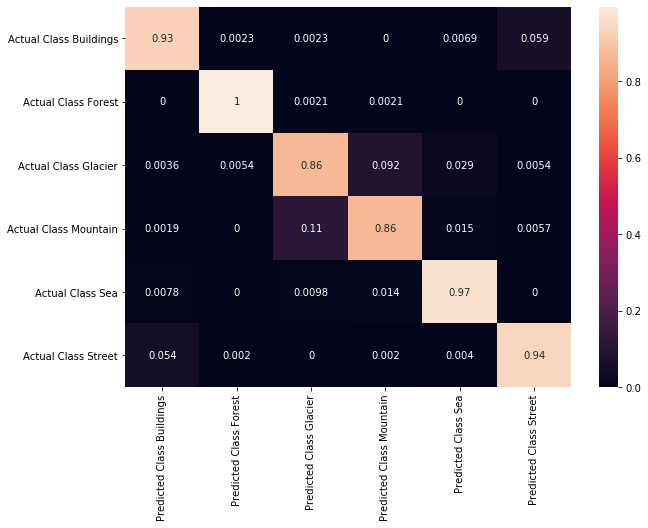

In [23]:
print(predictions_xcep_imageNet_T)
# Confusion matrix, averaged over num_runs
classes = {0:'buildings', 1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}
reverse_classes = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
class_labels = list(reverse_classes.keys())
y_pred_xcep_imageNet_T = np.argmax(np.mean(predictions_xcep_imageNet_T, axis = 0), axis = -1)
confusion = confusion_matrix(y_true = np.argmax(y_test1_categorical, axis = -1), y_pred = y_pred_xcep_imageNet_T, normalize= 'true') #np.mean for y_pred
df_cm = pd.DataFrame(confusion,index = ['Actual Class Buildings','Actual Class Forest','Actual Class Glacier',
                             'Actual Class Mountain','Actual Class Sea','Actual Class Street'],columns = ['Predicted Class Buildings','Predicted Class Forest','Predicted Class Glacier',
                             'Predicted Class Mountain','Predicted Class Sea','Predicted Class Street'])

# Add actual/predicted class to labels
#df_cm = pd.concat(
#    [pd.concat(
#        [df_cm],
#        keys=['Predicted Class'], axis=1)],
#    keys=['Actual Class']
#)
# Show confusion matrix
plt.figure(figsize = (10,7))
map=sn.heatmap(df_cm, annot=True)

print('Average train acc:', np.round(np.mean(train_accuracy_xcep_imageNet_T)*100, decimals=2))
print('Average validation acc:',  np.round(np.mean(val_accuracy_xcep_imageNet_T)*100, decimals =2))
print('Average test acc:',  np.round(np.mean(test_accuracy_xcep_imageNet_T)*100, decimals =2))

## Xception Model Accuracy is 88.73, We use this model to make predictions

## Save the Model

In [ ]:
model_xception.save('models/model_xception.h5')

In [ ]:
from PIL import Image 

## Sort the Labels

In [ ]:
labels = sorted(os.listdir('Intel_Image_classification/seg_train/seg_train/'))

In [ ]:
#del labels[0]

In [ ]:
labels

# Predicting IMAGES: 

## JUST ENTER THE IMAGE PATH AND I WILL TELL YOU WHAT IS THERE IN YOUR IMAGE

In [ ]:
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=20, loc="center",backgroundcolor='white',color='black',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='white',color='black')

In [ ]:
img_path=input("ENTER IMAGE PATH:")
img=load_img(img_path)
newsize = (150,150)
img = img.resize(newsize)
x = np.expand_dims(img, axis = 0)
x = x / 255
category1 = model_xception.predict(x)
category1 = np.argmax(category1, axis=1)
category1 = labels[int(category1)]
fig=plt.figure(figsize=(10,6))
plt.imshow(img)
plt.title("I THINK THIS PICTURE CONTAINS...", fontsize=20, loc="center",backgroundcolor='white',color='black',pad=20)
plt.xlabel(category1.upper(), fontsize=35, labelpad=20, backgroundcolor='white',color='black')

# lV.Conclusion: What we have learned from the structure of those networks
### 1.1x1 convolution: Increase dimensions or reduce dimensions, depends on the numbers of input channel and numbers of  1x1 conv filters
### 2.Making the network wider while making it deeper: multiple filters with different sizes operating on the same level. 
### 3.1xn + nx1 is actually cheaper than nxn, and we can replace n*n with y numbers of m*m if n*n/m*m>y and the respective field remain no less than n*n
### 4.Auxiliary loss: Network scale regularizers that prevent gradients from vanishing in the middle of a deep network
### 5.Modified Depthwise Separable Convolution: change dimension at the beginning so network would be lighter and cheaper
### 6.Residual connections: skip connections,taking short cut. So that we can still learn simple functions like identity functions with sufficiently deep networks without suffering from the degradation problem. This is common in RNN


# Conclusion:Our future Reasearch Direction
### Implement those techniques we learned from this project in our future models without using transfer learning. Come up with new ways just like Depthwise Separable Convolution that may reduce computaional complexity and improve val accuracy, then we can create new model that runs well on ImageNet dataset

# V. Reference
1.Brownlee, J. (2019, Jul 05). A Gentle Introduction to 1x1 Convolutions to Manage Model Complexity. Retrieved from https://machinelearningmastery.com/introduction-to-1x1-convolutions-to-reduce-the-complexity-of-convolutional-neural-networks/

2.Chollet, F. (2016, Oct 07) Xception: Deep Learning with Depthwise Separable Convolutions. Retrieved from
	https://arxiv.org/abs/1610.02357
    
3.Raj, B. (2020, July 31). A Simple Guide to the Versions of the Inception Network. Retrieved from https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

4.Roszczewska, K. (2020, Jul 07). Domain Adaptation With Xception and VGG16 Models. Retrieved from https://towardsdatascience.com/domain-adaptation-with-xception-and-vgg16-models-993744b06d31

5.Sahoo, S. (2018, Nov 29). Residual blocks - Building blocks of ResNet. Retrieved from https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec

6.Szegedy, C. Ioffe, S. Vanhoucke, V. Alemi, A. (2016, Feb 23). Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning. Retrieved from
https://arxiv.org/abs/1602.07261

7.Tsang, S. (2019, Mar 20). Review: Xception - With Depthwise Separable Convolution, Better Than Inception-v3 (Image... Retrieved from https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568